**MScFE 622 STOCHASTIC MODELING**

**Group Work Project # 2**

**Group 7372**

# **Step 0: Introduction**

# **Step 1: Individual and Group Data Collection**

In [ ]:
import sys
print(sys.version)


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]



For this project, we each picked some financial time series from stocks, bonds, and crypto, the - types of assets traded to make a profit or stack value.

We tracked prices daily starting 2019 into 2022, capturing major financial and economic events like the COVID-19 pandemic.   


**Asset Classes Chosen**

**Stocks** - Big tech companies investors bet on
- GOOGL (Alphabet Inc.)
- NVDA (NVIDIA Corporation)


**Bonds** - Loans in a bundle.
- IEF (iShares 7-10 Year Treasury Bond ETF)
- TLT (iShares 20+ Year Treasury Bond ETF)


**Crypto** - Digital currencies that can bubble or bust quickly.

- BTC-USD (Bitcoin)
- ETH-USD (Ethereum)


Blending these assets gives a full view.  We can break down how they move during panics and chill times to understand market behavior.  Tracing the flows reveals human nature - fear, greed, hope, and doubt all tied up in finance.


# **STEP 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import pandas as pd

**DOWNLOAD BASKET OF ASSETS**

In [ ]:
# Define the tickers for each asset class
tickers = ['GOOGL', 'META', 'NFLX', 'NVDA', 'IEF', 'TLT', 'BND', 'SHY', 'BTC-USD', 'ETH-USD']

# Create an empty DataFrame
df = pd.DataFrame()

# Download data for each ticker and merge into a single DataFrame
for tick in tickers:
    ydata = yf.download(tick, start="2018-01-01", end="2024-09-30")['Adj Close']
    df = pd.concat([df, ydata.rename(tick)], axis=1)  # Align data by the index (date)

# Display the first few rows of the combined DataFrame
print(df.head())

# Optionally handle any missing values (e.g., forward-fill missing data)
df.fillna(method='ffill', inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                         GOOGL        META        NFLX      NVDA        IEF  \
2018-01-02 00:00:00  53.527954  180.875397  201.070007  4.930222  91.755539   
2018-01-03 00:00:00  54.441196  184.115646  205.050003  5.254697  91.851486   
2018-01-04 00:00:00  54.652668  183.776672  205.630005  5.282396  91.807899   
2018-01-05 00:00:00  55.377377  186.289108  209.990005  5.327161  91.694496   
2018-01-08 00:00:00  55.572891  187.714813  212.050003  5.490389  91.650917   

                            TLT        BND        SHY       BTC-USD  \
2018-01-02 00:00:00  106.180107  67.522980  74.151169  14982.099609   
2018-01-03 00:00:00  106.687759  67.581078  74.151169  15201.000000   
2018-01-04 00:00:00  106.670853  67.547897  74.115738  15599.200195   
2018-01-05 00:00:00  106.366226  67.456589  74.115738  17429.500000   
2018-01-08 00:00:00  106.298531  67.464882  74.115738  15170.099609   

                         ETH-USD  
2018-01-02 00:00:00   884.443970  
2018-01-03 00:00:00   962.71

<ipython-input-157-e6d574de4a17>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


[*********************100%***********************]  6 of 6 completed


Statistical Summary for Returns:
             Mean    Median  Variance  Standard Deviation  Skewness  \
Ticker                                                                
BTC-USD  0.002106  0.001164  0.001657            0.040701 -0.805236   
ETH-USD  0.002037  0.000882  0.002570            0.050696 -0.941919   
GOOGL    0.001109  0.001090  0.000380            0.019505  0.277129   
IEF      0.000086  0.000262  0.000019            0.004339 -0.072710   
NVDA     0.002038  0.002123  0.001011            0.031795  0.314539   
TLT      0.000255  0.000784  0.000113            0.010625 -0.094253   

          Kurtosis  Shapiro-Wilk p-value  
Ticker                                    
BTC-USD  11.170565          2.568834e-20  
ETH-USD   8.336324          1.627466e-17  
GOOGL     3.611346          5.459511e-16  
IEF       4.687676          8.471390e-15  
NVDA      1.866085          3.567974e-08  
TLT       7.383513          1.742956e-17  


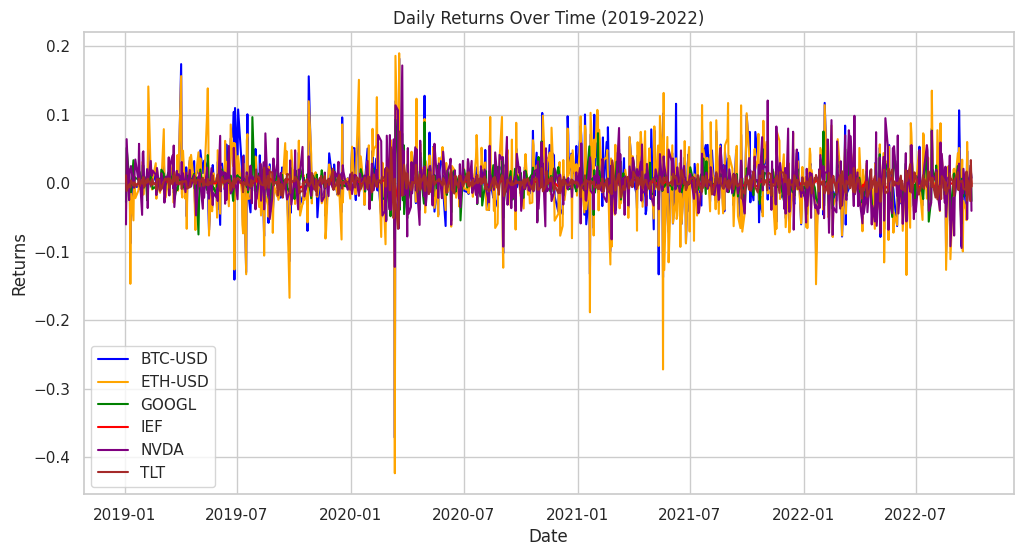

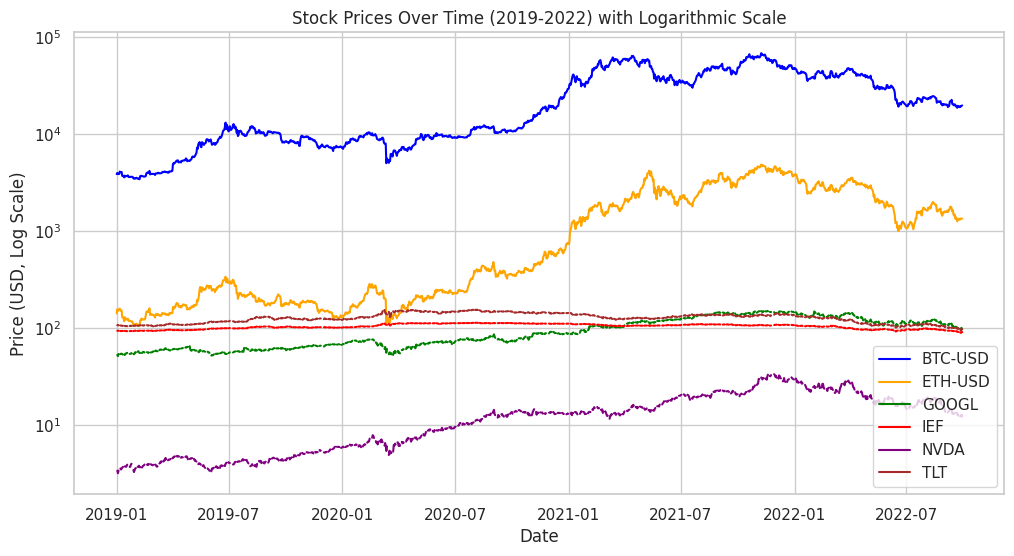

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import shapiro, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Define tickers for the selected assets
tickers = ["GOOGL", "NVDA", "IEF", "TLT", "BTC-USD", "ETH-USD"]

# Define the date range
start_date = "2019-01-01"
end_date = "2022-09-30"

# Fetch historical data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the time series (removing NAs before calculating pct_change)
returns = data.pct_change(fill_method=None).dropna()

# Calculate key statistics for each asset's returns
mean_returns = returns.mean()
median_returns = returns.median()
variance_returns = returns.var()
std_dev_returns = returns.std()
skewness_returns = returns.apply(lambda x: skew(x, bias=False))
kurtosis_returns = returns.apply(lambda x: kurtosis(x, bias=False))

# Perform Shapiro-Wilk test for normality
normality_test_results = returns.apply(lambda x: shapiro(x)[1])  # returns the p-value

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_returns,
    'Median': median_returns,
    'Variance': variance_returns,
    'Standard Deviation': std_dev_returns,
    'Skewness': skewness_returns,
    'Kurtosis': kurtosis_returns,
    'Shapiro-Wilk p-value': normality_test_results
})

# Display the summary statistics
print("Statistical Summary for Returns:")
print(summary_stats)

# Visualizations
sns.set(style="whitegrid")

# Set unique colors for each asset
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Line Chart of Returns Over Time
plt.figure(figsize=(12, 6))
for i, col in enumerate(returns.columns):
    plt.plot(returns.index, returns[col], label=col, color=colors[i])
plt.title("Daily Returns Over Time (2019-2022)")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


# Unique colors for each asset
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Visualizations
# Line Chart of Stock Prices Over Time with Log Scale for Y-axis
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns):
    plt.plot(data.index, data[col], label=col, color=colors[i])
plt.yscale('log')  # Apply log scale to the y-axis
plt.title("Stock Prices Over Time (2019-2022) with Logarithmic Scale")
plt.ylabel("Price (USD, Log Scale)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(list(df.columns))

['GOOGL', 'META', 'NFLX', 'NVDA', 'IEF', 'TLT', 'BND', 'SHY', 'BTC-USD', 'ETH-USD']


In [ ]:
df.to_csv('SM_GWP2dat.csv')

In [ ]:
df

GOOGL        META        NFLX        NVDA  \
2018-01-02 00:00:00   53.527954  180.875397  201.070007    4.930222   
2018-01-03 00:00:00   54.441196  184.115646  205.050003    5.254697   
2018-01-04 00:00:00   54.652668  183.776672  205.630005    5.282396   
2018-01-05 00:00:00   55.377377  186.289108  209.990005    5.327161   
2018-01-08 00:00:00   55.572891  187.714813  212.050003    5.490389   
...                         ...         ...         ...         ...   
2024-09-15 00:00:00  163.949997  567.359985  707.349976  121.400002   
2024-09-21 00:00:00  163.949997  567.359985  707.349976  121.400002   
2024-09-22 00:00:00  163.949997  567.359985  707.349976  121.400002   
2024-09-28 00:00:00  163.949997  567.359985  707.349976  121.400002   
2024-09-29 00:00:00  163.949997  567.359985  707.349976  121.400002   

                           IEF         TLT        BND        SHY  \
2018-01-02 00:00:00  91.755539  106.180107  67.522980  74.151169   
2018-01-03 00:00:00  91.851486  106.687759  67.581078  74.151169   
2018-01-04 00:00:00  91.807899  106.670853  67.547897  74.115738   
2018-01-05 00:00:00  91.694496  106.366226  67.456589  74.115738   
2018-01-08 00:00:00  91.650917  106.298531  67.464882  74.115738   
...                        ...         ...        ...        ...   
2024-09-15 00:00:00  98.103210   98.252487  75.058502  82.996605   
2024-09-21 00:00:00  98.103210   98.252487  75.058502  82.996605   
2024-09-22 00:00:00  98.103210   98.252487  75.058502  82.996605   
2024-09-28 00:00:00  98.103210   98.252487  75.058502  82.996605   
2024-09-29 00:00:00  98.103210   98.252487  75.058502  82.996605   

                          BTC-USD      ETH-USD  
2018-01-02 00:00:00  14982.099609   884.443970  
2018-01-03 00:00:00  15201.000000   962.719971  
2018-01-04 00:00:00  15599.200195   980.921997  
2018-01-05 00:00:00  17429.500000   997.719971  
2018-01-08 00:00:00  15170.099609  1148.530029  
...                           ...          ...  
2024-09-15 00:00:00  59182.835938  2320.897217  
2024-09-21 00:00:00  63394.839844  2615.857178  
2024-09-22 00:00:00  63648.710938  2582.862549  
2024-09-28 00:00:00  65887.648438  2677.539062  
2024-09-29 00:00:00  65635.304688  2659.346924  

[2464 rows x 10 columns]

**DAILY ASSET RETURNS**

In [ ]:
df=df.pct_change(axis=0) #Daily returns
df

GOOGL      META      NFLX      NVDA       IEF  \
2018-01-02 00:00:00       NaN       NaN       NaN       NaN       NaN   
2018-01-03 00:00:00  0.017061  0.017914  0.019794  0.065814  0.001046   
2018-01-04 00:00:00  0.003884 -0.001841  0.002829  0.005271 -0.000475   
2018-01-05 00:00:00  0.013260  0.013671  0.021203  0.008474 -0.001235   
2018-01-08 00:00:00  0.003531  0.007653  0.009810  0.030641 -0.000475   
...                       ...       ...       ...       ...       ...   
2024-09-15 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-09-21 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-09-22 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-09-28 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-09-29 00:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   

                          TLT       BND       SHY   BTC-USD   ETH-USD  
2018-01-02 00:00:00       NaN       NaN       NaN       NaN       NaN  
2018-01-03 00:00:00  0.004781  0.000860  0.000000  0.014611  0.088503  
2018-01-04 00:00:00 -0.000158 -0.000491 -0.000478  0.026196  0.018907  
2018-01-05 00:00:00 -0.002856 -0.001352  0.000000  0.117333  0.017125  
2018-01-08 00:00:00 -0.000636  0.000123  0.000000 -0.129631  0.151155  
...                       ...       ...       ...       ...       ...  
2024-09-15 00:00:00  0.000000  0.000000  0.000000 -0.013704 -0.040395  
2024-09-21 00:00:00  0.000000  0.000000  0.000000  0.071169  0.127089  
2024-09-22 00:00:00  0.000000  0.000000  0.000000  0.004005 -0.012613  
2024-09-28 00:00:00  0.000000  0.000000  0.000000  0.035176  0.036656  
2024-09-29 00:00:00  0.000000  0.000000  0.000000 -0.003830 -0.006794  

[2464 rows x 10 columns]

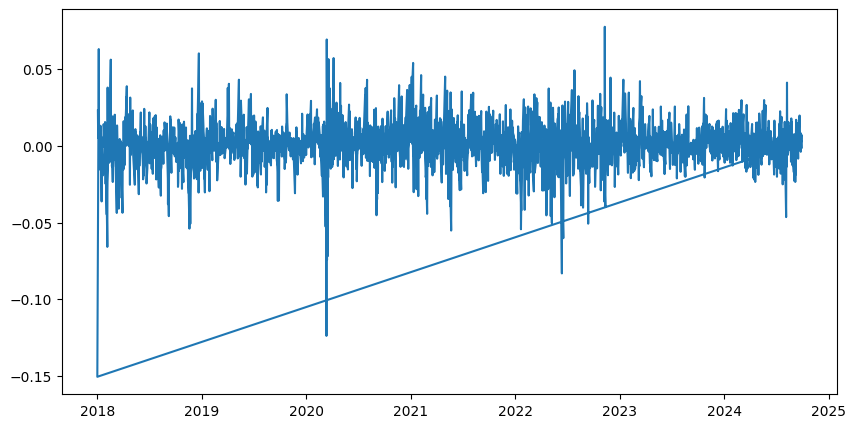

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df.mean(axis=1))
plt.show()

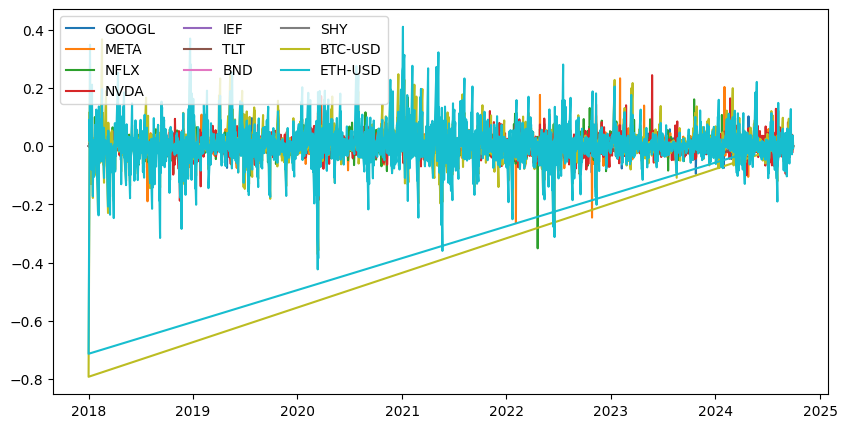

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df)
plt.legend(tickers,loc='upper left',ncol=3)
plt.show()

In [ ]:
df.corr()

GOOGL      META      NFLX      NVDA       IEF       TLT       BND  \
GOOGL    1.000000  0.637505  0.479717  0.599668 -0.066798 -0.102836  0.120262   
META     0.637505  1.000000  0.486877  0.526563 -0.049910 -0.072593  0.099930   
NFLX     0.479717  0.486877  1.000000  0.485524 -0.003875 -0.034544  0.111713   
NVDA     0.599668  0.526563  0.485524  1.000000 -0.063125 -0.070322  0.106926   
IEF     -0.066798 -0.049910 -0.003875 -0.063125  1.000000  0.913258  0.837552   
TLT     -0.102836 -0.072593 -0.034544 -0.070322  0.913258  1.000000  0.779779   
BND      0.120262  0.099930  0.111713  0.106926  0.837552  0.779779  1.000000   
SHY     -0.008960 -0.009201  0.033543 -0.038120  0.812769  0.602634  0.707460   
BTC-USD  0.138473  0.119046  0.117281  0.158726 -0.004951 -0.016240  0.083853   
ETH-USD  0.157481  0.126946  0.118609  0.171722 -0.013038 -0.026236  0.077025   

              SHY   BTC-USD   ETH-USD  
GOOGL   -0.008960  0.138473  0.157481  
META    -0.009201  0.119046  0.126946  
NFLX     0.033543  0.117281  0.118609  
NVDA    -0.038120  0.158726  0.171722  
IEF      0.812769 -0.004951 -0.013038  
TLT      0.602634 -0.016240 -0.026236  
BND      0.707460  0.083853  0.077025  
SHY      1.000000  0.026726  0.016720  
BTC-USD  0.026726  1.000000  0.811146  
ETH-USD  0.016720  0.811146  1.000000

**DISPERSION OF DAILY ASSET RETURNS**

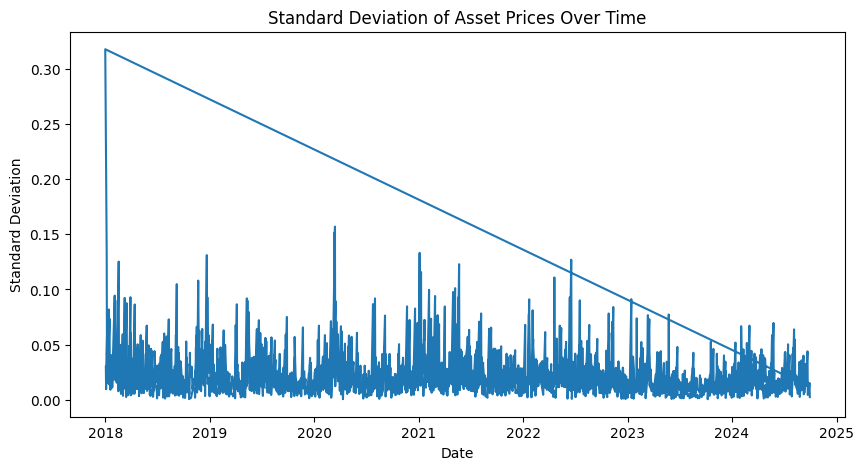

In [ ]:
# Calculate standard deviation across columns (for each date)
df = df.std(axis=1)

# Drop any rows with missing values (if needed)
df = df.dropna(axis=0)

# Plot the result
plt.figure(figsize=(10,5))
plt.plot(df.index, df)  # Correct the function to plt.plot()
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Asset Prices Over Time')
plt.show()


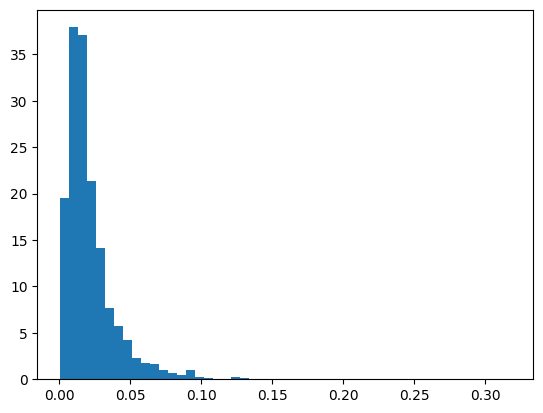

In [ ]:
 count,bins,ignored=plt.hist(df,50,density=True)
 plt.show()

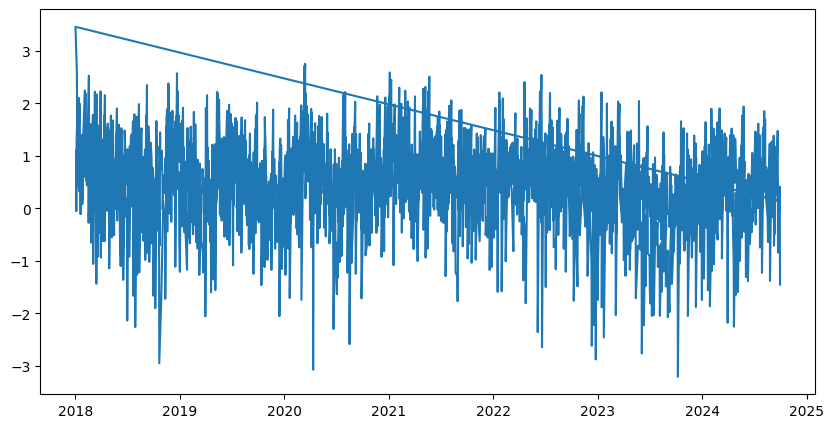

In [ ]:
df=np.log(100*df)
plt.figure(figsize=(10,5))
plt.plot(df.index, df)
plt.show()

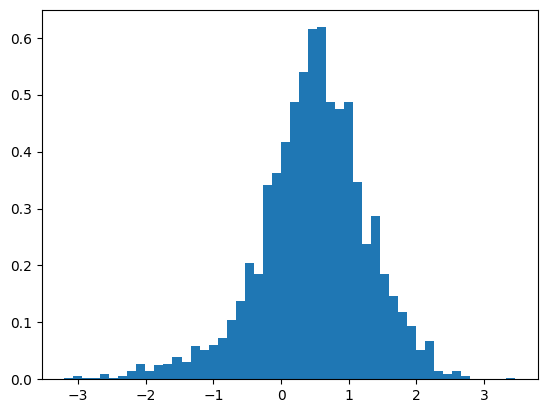

In [ ]:
 #Histogram of the law of time series
 #Distribution unimodal
 count,bins,ignored=plt.hist(df,50,density=True)
 plt.show()

# **STEP 2**

## **(a) Regime change visualizations**

**DEFINE FUNCTIONS**

In [ ]:
# Estimation of model with changes in volatility regimes
# Build function that performs the E step

# Likelihood of an observation
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like, phi

In [ ]:
import yfinance as yf
# Define the ticker and the date range
ticker = '^VXD'
start_date = '1990-01-01'
end_date = '2024-12-31'

# Fetch the data
YData = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:

# Log likelihood
def log_likelihood2(xi_prob, T, pi_hat0, P, mu, sigma, Y):
    y_like = np.zeros(T)
    for tt in range(0, T):

      y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])
    sum_log_like = np.sum(np.log(y_like))  # Compute sum of log likelihoods
    k = (np.prod(mu.shape) + np.prod(sigma.shape))
    k += (np.prod(pi_hat0.shape) + np.prod(P.shape))  # Number of parameters (k)

    n = len(Y)  # Number of observations
    akaike = 2 * k - 2 * sum_log_like  # Akaike information criterion (AIC)
    schwarz = k * np.log(n) - 2 * sum_log_like  # Schwarz criterion (BIC)

    return sum_log_like, akaike, schwarz


In [ ]:
# Estimation of model with changes in volatility regimes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Estimation of model with changes in volatility regimes
# Build function that performs the E step
# Likelihood of an observation


def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like


# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1


def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

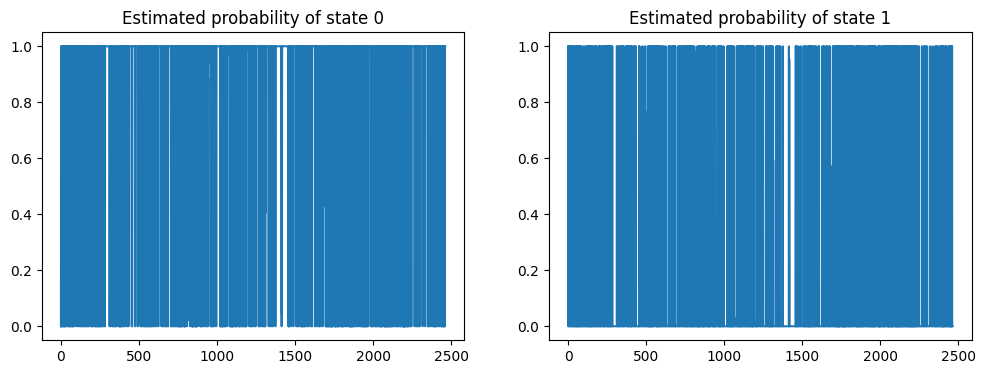

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -59128.6245 Change: 0.9994


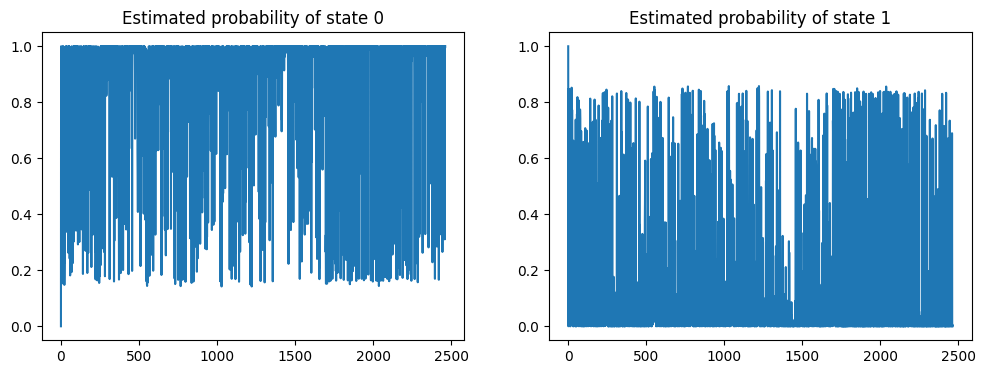

Iteration: 1
Log-likelihood: -4432.8193 Change: 0.925


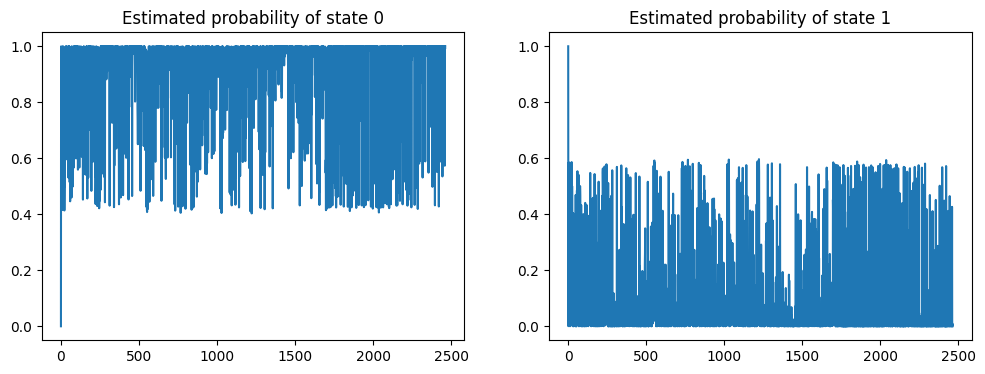

Iteration: 2
Log-likelihood: -3989.2933 Change: 0.1001


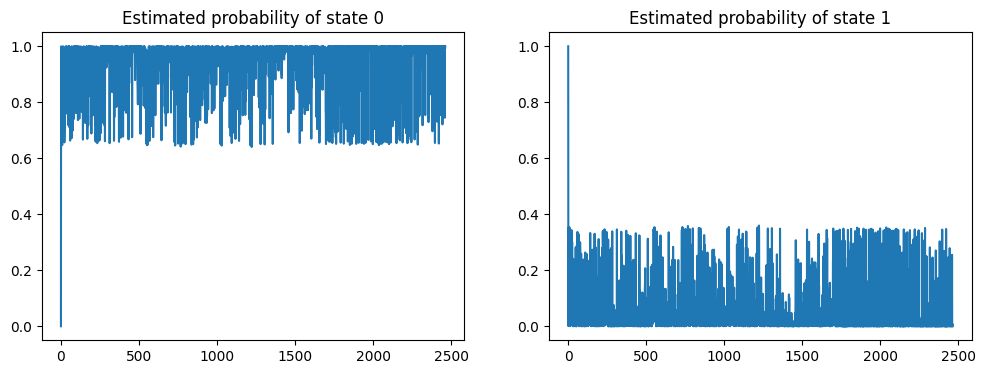

Iteration: 3
Log-likelihood: -3763.6252 Change: 0.0566


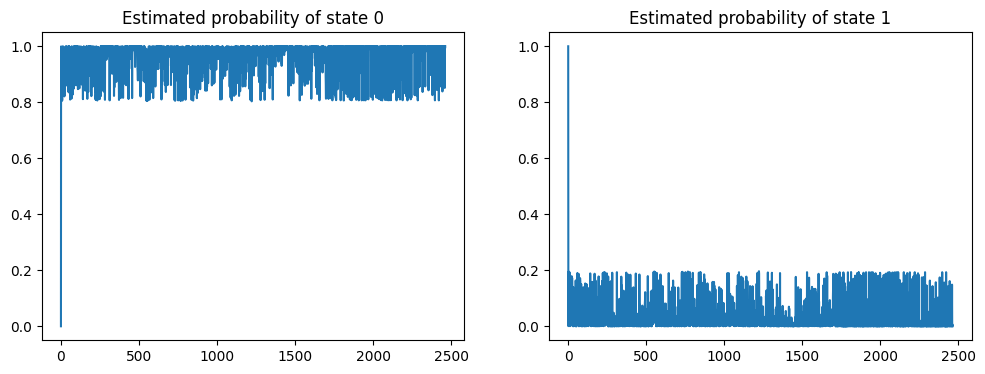

Iteration: 4
Log-likelihood: -3637.8606 Change: 0.0334


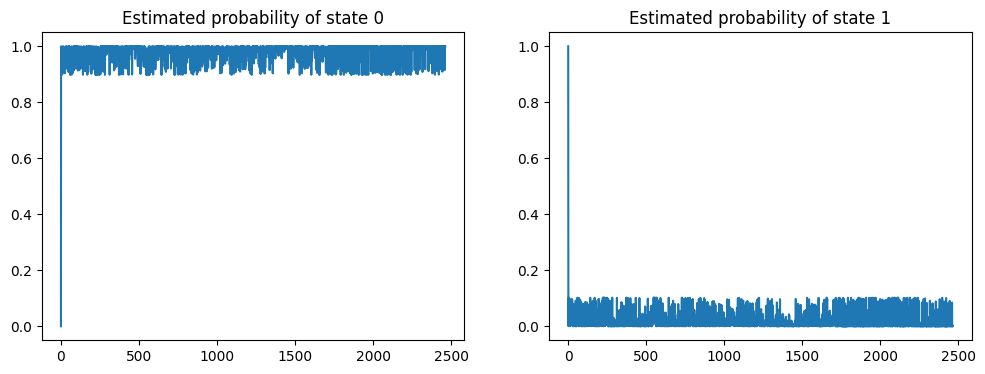

Iteration: 5
Log-likelihood: -3569.3455 Change: 0.0188


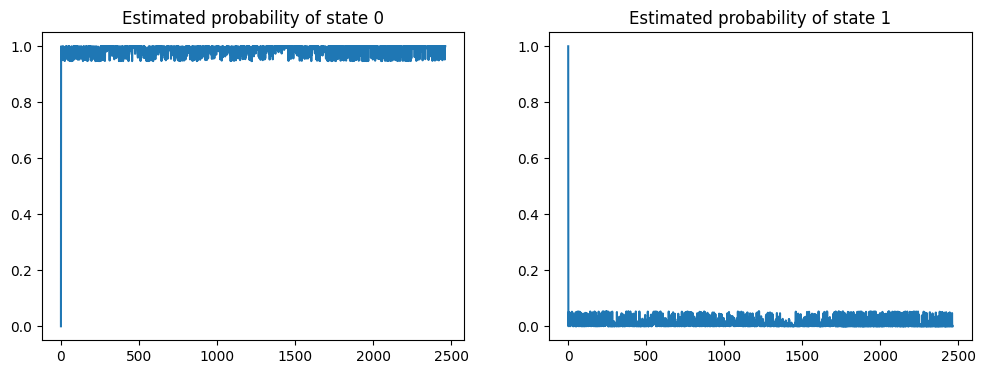

Iteration: 6
Log-likelihood: -3533.0911 Change: 0.0102


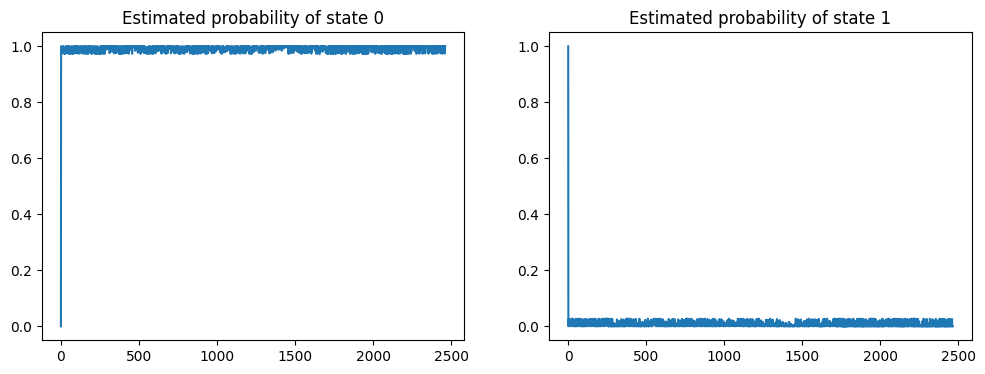

Iteration: 7
Log-likelihood: -3514.2287 Change: 0.0053


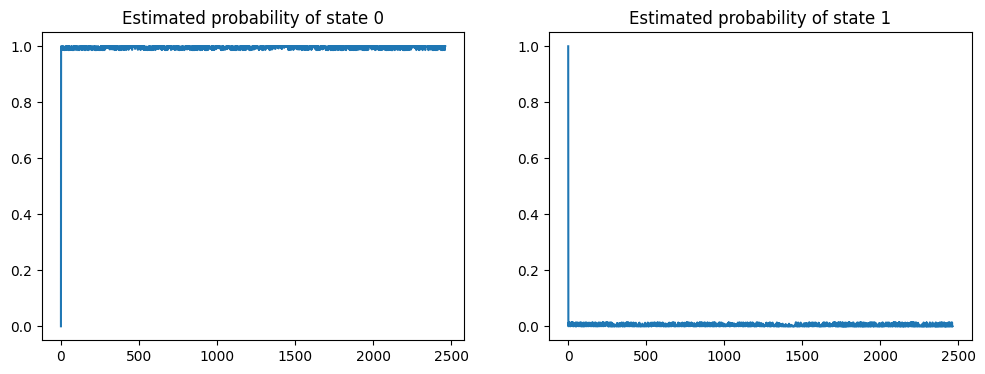

Iteration: 8
Log-likelihood: -3504.4945 Change: 0.0028


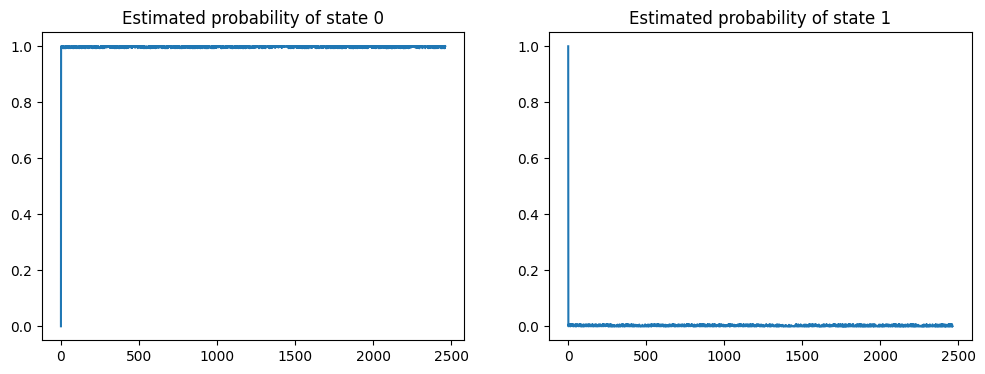

Iteration: 9
Log-likelihood: -3499.4942 Change: 0.0014


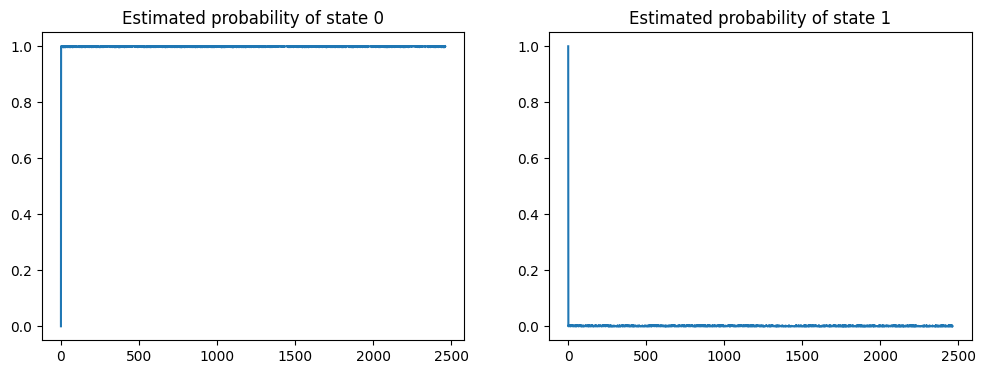

Iteration: 10
Log-likelihood: -3496.9355 Change: 0.0007


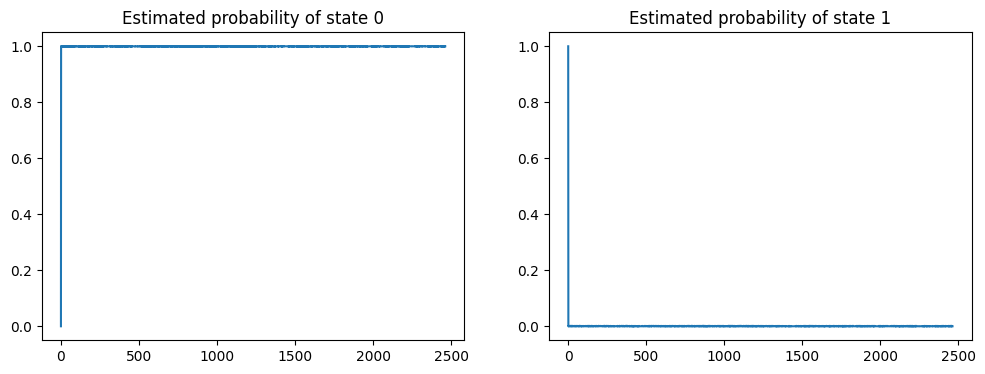

Iteration: 11
Log-likelihood: -3495.6248 Change: 0.0004


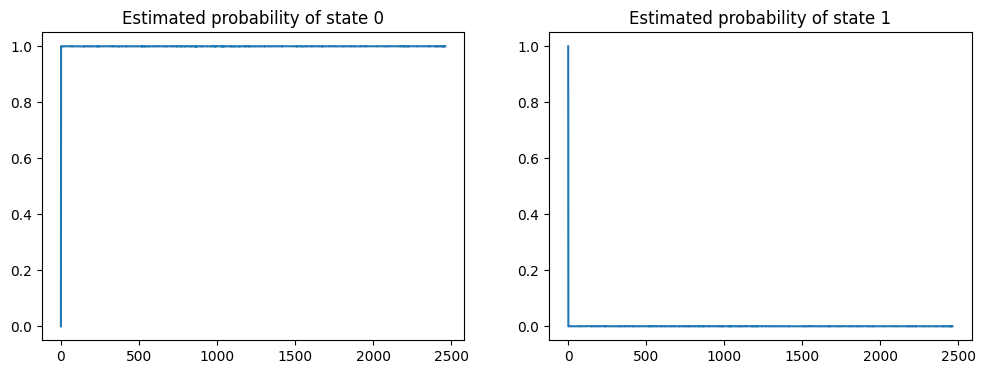

Iteration: 12
Log-likelihood: -3494.9357 Change: 0.0002


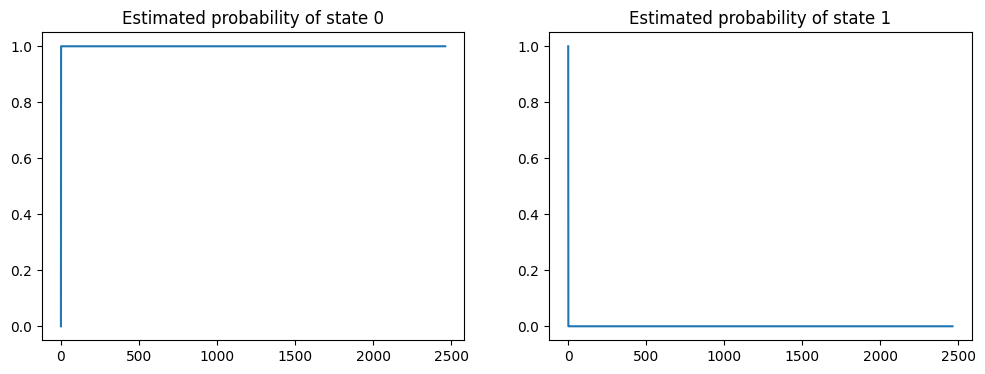

Iteration: 13
Log-likelihood: -3494.5546 Change: 0.0001


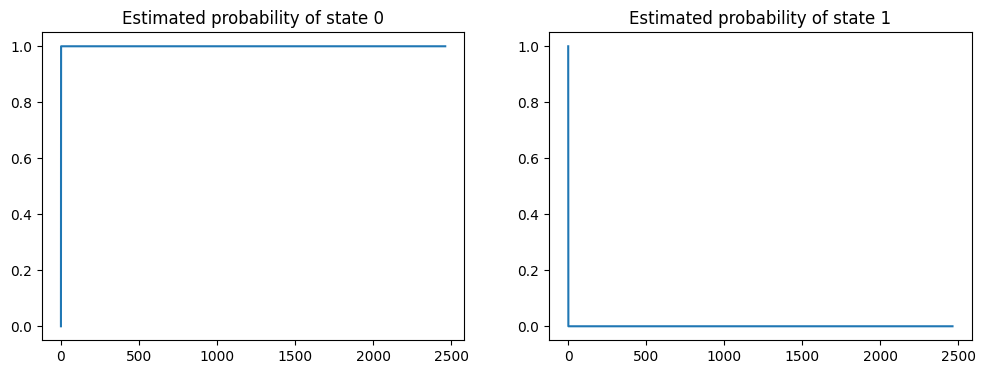

Iteration: 14
Log-likelihood: -3494.3807 Change: 0.0
Final estimates:
Log-Likelihood: -3494.3807 Akaike: 7008.7615 Schwarz: 7066.8528
Mu: [0.4658 1.0977]
Sigma: [0.8124 0.0233]
Transition Matrix:
[1. 0.]
[1. 0.]
Initial probabilities: [0. 1.]


In [ ]:
# Initialize parameters
T = len(df)
N = 2

# Set initial guesses
mu_hat0 = np.array([0, 2])  # Mean guesses for 2 states
sigma_hat0 = np.array([0.1, 0.1])  # Standard deviation guesses for 2 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.5, 0.5])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")

    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


## **(b) Regime Switching Models**

In [ ]:
#Regime switching Models
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

In [ ]:
model=sm.tsa.MarkovRegression(df,k_regimes=2,switching_variance=True)
model = MarkovRegression(df, k_regimes=2, switching_variance=True)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                 2463
Model:               MarkovRegression   Log Likelihood               -2683.299
Date:                Wed, 23 Oct 2024   AIC                           5378.599
Time:                        12:46:13   BIC                           5413.453
Sample:                             0   HQIC                          5391.262
                               - 2463                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5785      0.014     40.780      0.000       0.551       0.606
sigma2         0.3404      0.012     29.078      0.0

### (i) **Different States**

**(i) Models with different states ($N$)**

In [ ]:
# Initialize parameters
T = len(df)
N = 4

# SET INITIAL GUESS
Mu_hat = [-0.1, 0, 0.5, 1] * np.ones(N)
Sigma_hat0 = [0.1, 0.1, 0.1, 0.1] * np.ones(N)

P_hat0 = np.zeros((N, N))  # Corrected to N x N matrix

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 0.15
P_hat0[0, 2] = 0.1
P_hat0[0, 3] = 0

P_hat0[1, 0] = 0.1
P_hat0[1, 1] = 0.75
P_hat0[1, 2] = 0.1
P_hat0[1, 3] = 0.05

P_hat0[2, 0] = 0.05
P_hat0[2, 1] = 0.1
P_hat0[2, 2] = 0.75
P_hat0[2, 3] = 0.1

P_hat0[3, 0] = 0
P_hat0[3, 1] = 0.1
P_hat0[3, 2] = 0.15
P_hat0[3, 3] = 0.75

# Set as initial probability the stationary distribution
Pi_hat0 = [0.25, 0.25, 0.25, 0.25] * np.ones(N)

# Perform 100 iterations to update Pi_hat0
for t in range(100):
    Pi_hat0 = np.dot(P_hat0.T, Pi_hat0)  # Corrected variable name to Pi_hat0 in loop
print(Pi_hat0)


[0.1875 0.3125 0.3125 0.1875]


<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

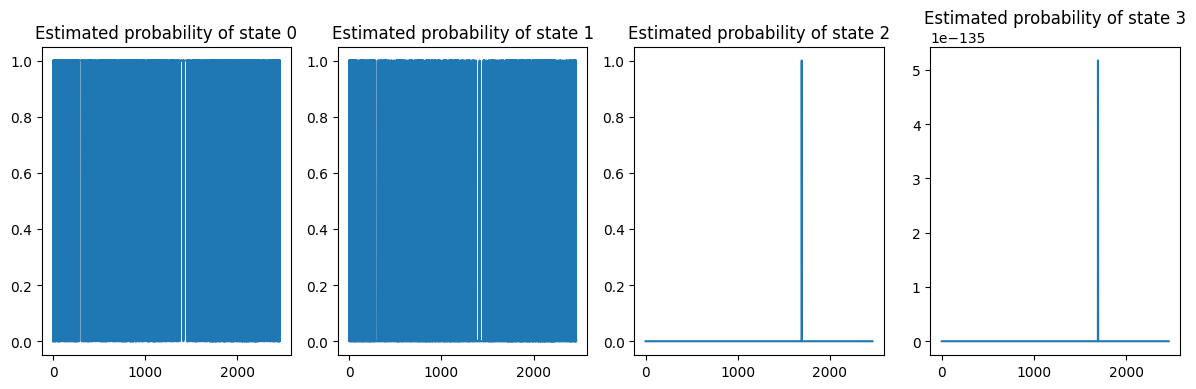

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -59875.7837 Change: 0.9994


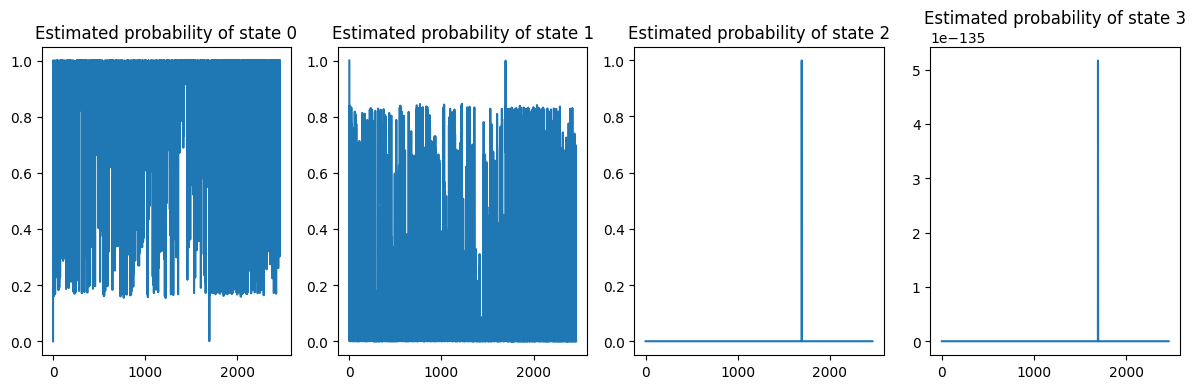

Iteration: 1
Log-likelihood: -4445.5456 Change: 0.9258


<ipython-input-172-91da0af7ba2f>:14: RuntimeWarning: divide by zero encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-172-91da0af7ba2f>:30: RuntimeWarning: divide by zero encountered in scalar divide
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:40: RuntimeWarning: divide by zero encountered in scalar divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:14: RuntimeWarning: invalid value encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-172-91da0af7ba2f>:40: RuntimeWarning: invalid value encountered in scalar divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


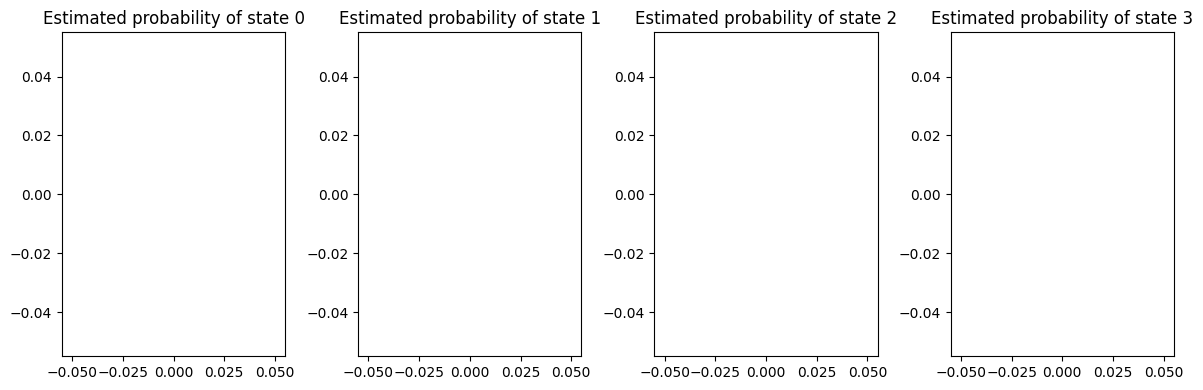

Iteration: 2
Log-likelihood: nan Change: nan
Final estimates:
Log-Likelihood: nan Akaike: nan Schwarz: nan
Mu: [0.2725 1.4487 3.4595 3.4595]
Sigma: [0.7241 0.4188 0.     0.    ]
Transition Matrix:
[8.379e-01 1.616e-01 5.000e-04 0.000e+00]
[0.8311 0.1689 0.     0.    ]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
Initial probabilities: [0. 1. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 4  # Number of states

# Set initial guesses
mu_hat0 = np.array([0, 2, 4, 6])  # Mean guesses for 4 states
sigma_hat0 = np.array([0.1, 0.1, 0.1, 0.1])  # Standard deviation guesses for 4 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.4
P_hat0[0, 1] = 0.3
P_hat0[0, 2] = 0.2
P_hat0[0, 3] = 0.1
P_hat0[1, 0] = 0.3
P_hat0[1, 1] = 0.4
P_hat0[1, 2] = 0.2
P_hat0[1, 3] = 0.1
P_hat0[2, 0] = 0.2
P_hat0[2, 1] = 0.3
P_hat0[2, 2] = 0.4
P_hat0[2, 3] = 0.1
P_hat0[3, 0] = 0.1
P_hat0[3, 1] = 0.2
P_hat0[3, 2] = 0.3
P_hat0[3, 3] = 0.4

# Ensure rows sum to 1
P_hat0 = P_hat0 / P_hat0.sum(axis=1, keepdims=True)

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.1875,0.3125,0.3125,0.1875])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(12, 4))
    for i in range(N):
        plt.subplot(1, 4, i + 1)
        plt.plot(xi_prob_T[:, i])
        plt.title(f"Estimated probability of state {i}")

    plt.tight_layout()
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


### **(ii) model with same sigma different mu**

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

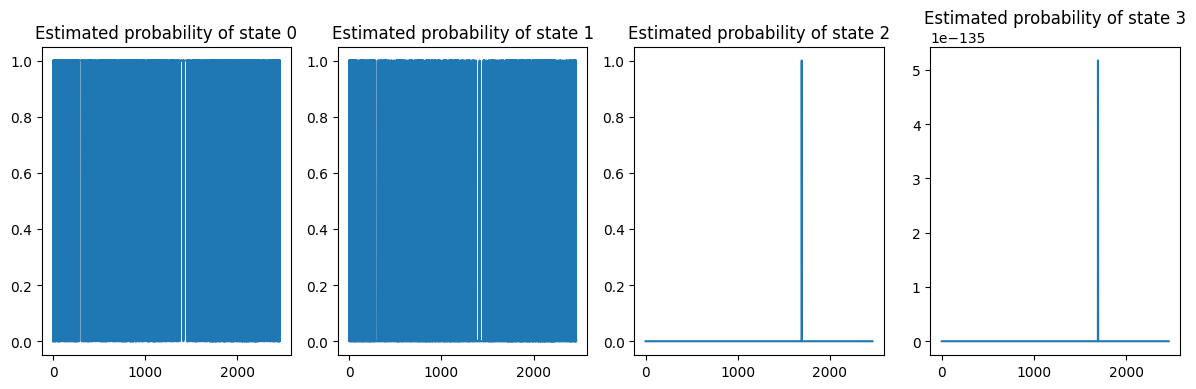

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -59875.7837 Change: 0.9994


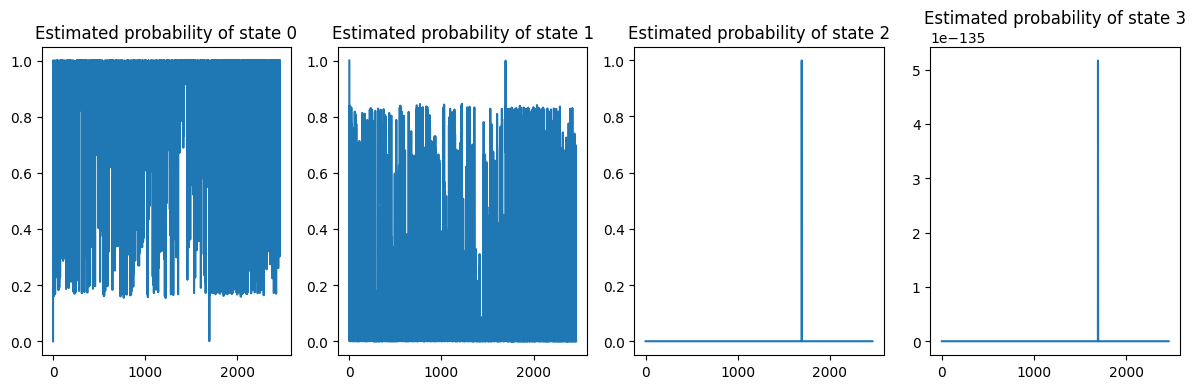

Iteration: 1
Log-likelihood: -4445.5456 Change: 0.9258


<ipython-input-172-91da0af7ba2f>:14: RuntimeWarning: divide by zero encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-172-91da0af7ba2f>:30: RuntimeWarning: divide by zero encountered in scalar divide
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:40: RuntimeWarning: divide by zero encountered in scalar divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:14: RuntimeWarning: invalid value encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-172-91da0af7ba2f>:40: RuntimeWarning: invalid value encountered in scalar divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


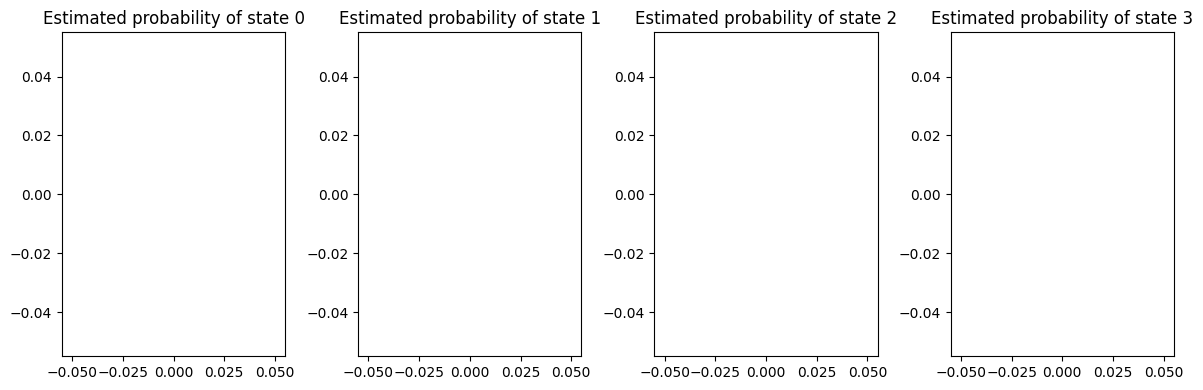

Iteration: 2
Log-likelihood: nan Change: nan
Final estimates:
Log-Likelihood: nan Akaike: nan Schwarz: nan
Mu: [0.2725 1.4487 3.4595 3.4595]
Sigma: [0.7241 0.4188 0.     0.    ]
Transition Matrix:
[8.379e-01 1.616e-01 5.000e-04 0.000e+00]
[0.8311 0.1689 0.     0.    ]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
Initial probabilities: [0. 1. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 4  # Number of states

# Set initial guesses
mu_hat0 = np.array([0, 2, 4, 6])  # Mean guesses for 4 states
sigma_hat0 = np.array([0.1, 0.1, 0.1, 0.1])  # Standard deviation guesses for 4 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.4
P_hat0[0, 1] = 0.3
P_hat0[0, 2] = 0.2
P_hat0[0, 3] = 0.1
P_hat0[1, 0] = 0.3
P_hat0[1, 1] = 0.4
P_hat0[1, 2] = 0.2
P_hat0[1, 3] = 0.1
P_hat0[2, 0] = 0.2
P_hat0[2, 1] = 0.3
P_hat0[2, 2] = 0.4
P_hat0[2, 3] = 0.1
P_hat0[3, 0] = 0.1
P_hat0[3, 1] = 0.2
P_hat0[3, 2] = 0.3
P_hat0[3, 3] = 0.4

# Ensure rows sum to 1
P_hat0 = P_hat0 / P_hat0.sum(axis=1, keepdims=True)

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.1875,0.3125,0.3125,0.1875])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(12, 4))
    for i in range(N):
        plt.subplot(1, 4, i + 1)
        plt.plot(xi_prob_T[:, i])
        plt.title(f"Estimated probability of state {i}")

    plt.tight_layout()
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


### **(iii) model with same mu different sigma**

In [ ]:
#SET INITIAL GUESS
T=len(df)
N=2
#SET INITIAL GUESS
mu_hat0=[0,2]*np.ones((N))
sigma_hat0=0.1

def M_step_func_v2(xi_prob, P, N, T, Y):
    # Initialize estimates
    mu_hat = np.zeros(N)
    sigma_hat = 0  # Accumulates sigma_hat values
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros(N)

    # Update mu_hat (mean estimates)
    for ss in range(N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        # Update sigma_hat (variance estimates)
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat += xi_y_mu2  # Summing up across states

    # Update P_hat (transition probability estimates)
    for ss in range(N):
        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

    # Update pi_hat (initial probabilities)
    pi_hat = xi_prob[0, :]

    # Final sigma_hat computation
    sigma_hat = np.sqrt(sigma_hat / T)

    return mu_hat, sigma_hat, P_hat, pi_hat
    print(mu_hat, sigma_hat, P_hat, pi_hat)


<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

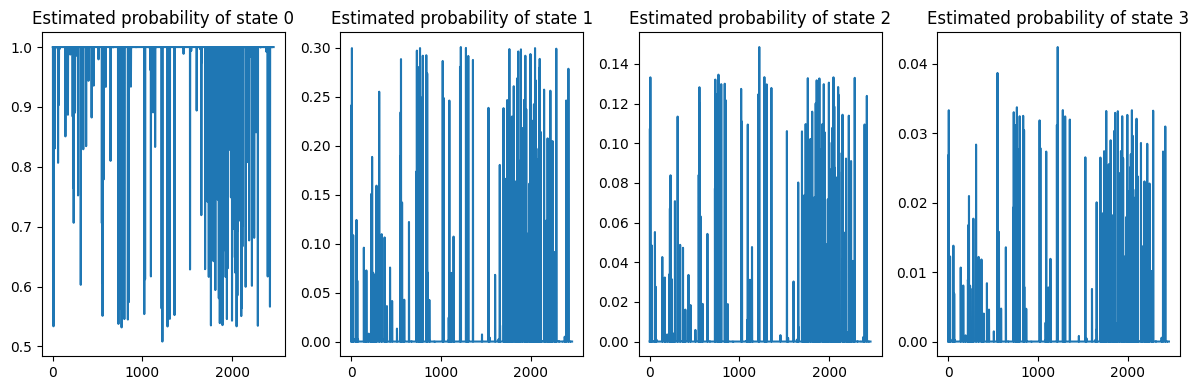

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -97240.023 Change: 0.999


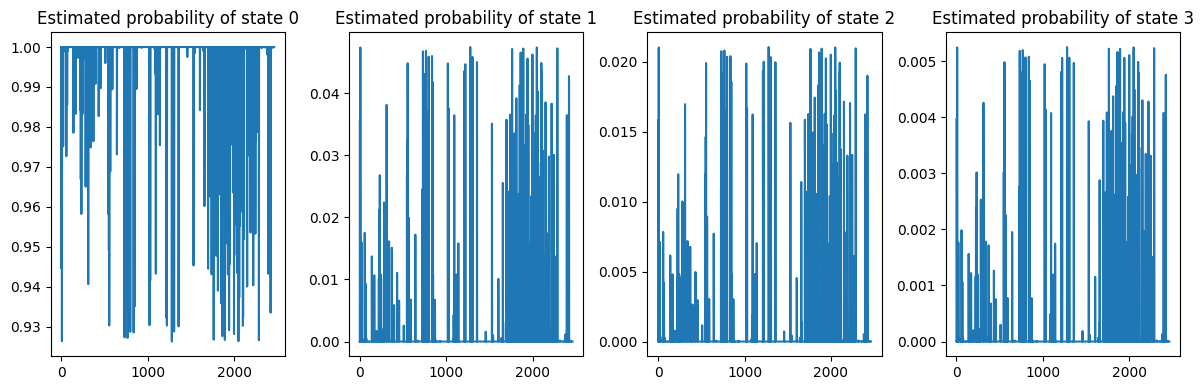

Iteration: 1
Log-likelihood: -3560.9984 Change: 0.9634


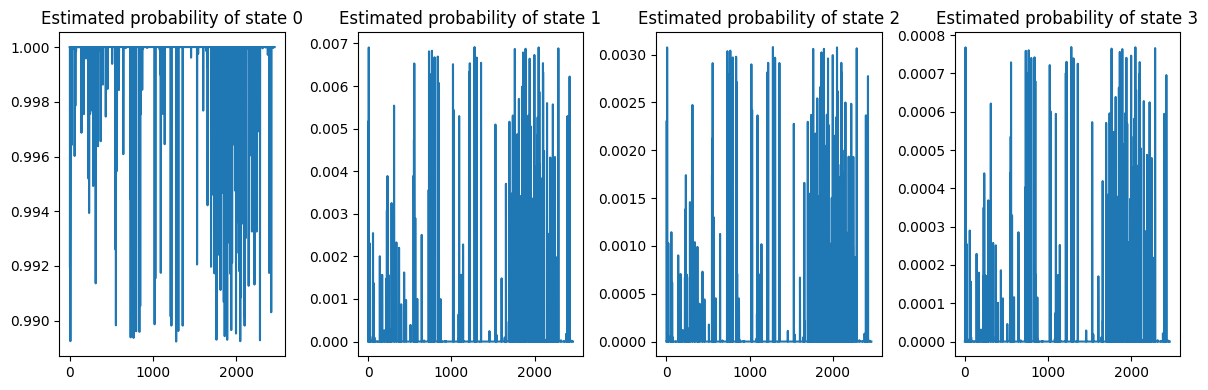

Iteration: 2
Log-likelihood: -3504.4383 Change: 0.0159


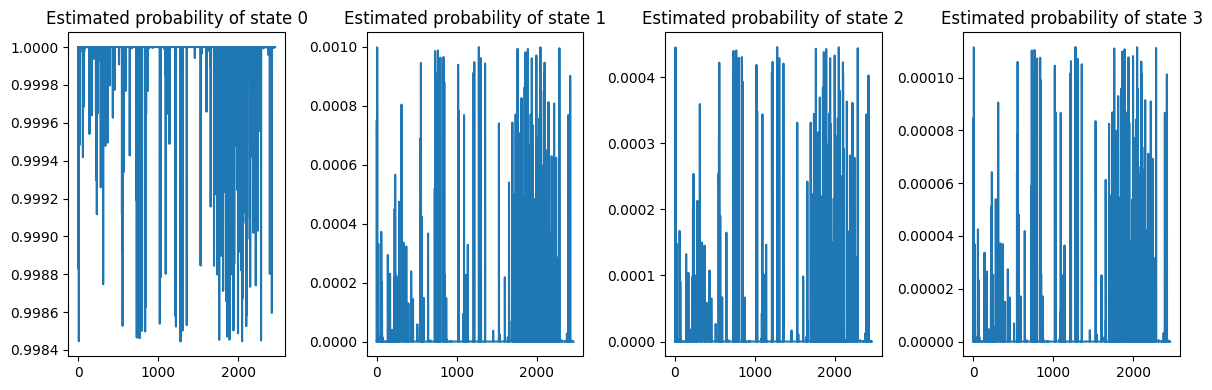

Iteration: 3
Log-likelihood: -3496.234 Change: 0.0023


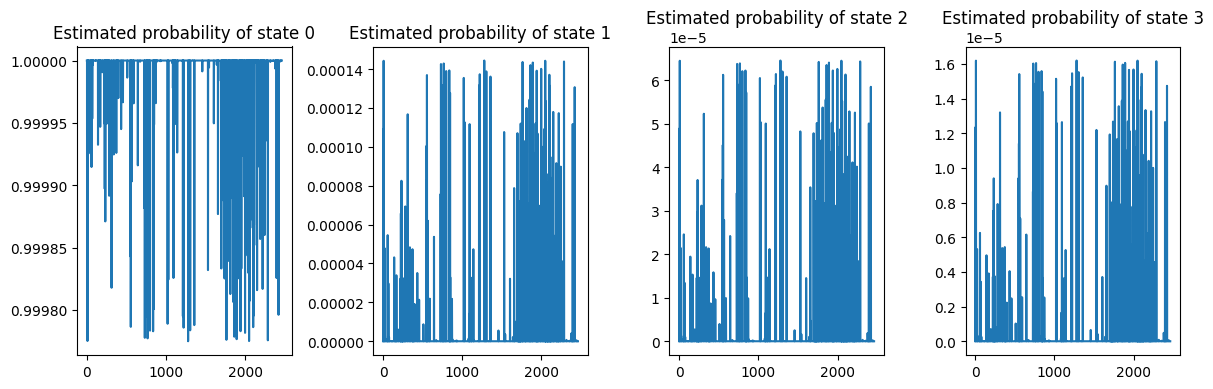

Iteration: 4
Log-likelihood: -3495.0467 Change: 0.0003


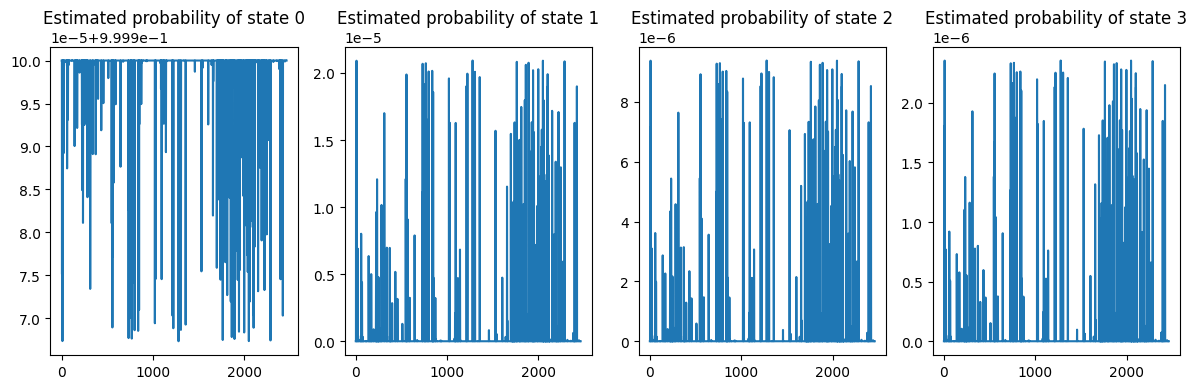

Iteration: 5
Log-likelihood: -3494.8748 Change: 0.0
Final estimates:
Log-Likelihood: -3494.8748 Akaike: 7045.7496 Schwarz: 7208.4054
Mu: [0.466  1.9587 1.9582 1.9571]
Sigma: [0.8123 0.1315 0.1318 0.1319]
Transition Matrix:
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
Initial probabilities: [1. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 4  # Number of states

# Set initial guesses
mu_hat0 = np.array([2, 2, 2, 2])  # Mean guesses for 4 states
sigma_hat0 = np.array([0.2, 0.1, 0.1, 0.1])  # Standard deviation guesses for 4 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.4
P_hat0[0, 1] = 0.3
P_hat0[0, 2] = 0.2
P_hat0[0, 3] = 0.1
P_hat0[1, 0] = 0.3
P_hat0[1, 1] = 0.4
P_hat0[1, 2] = 0.2
P_hat0[1, 3] = 0.1
P_hat0[2, 0] = 0.2
P_hat0[2, 1] = 0.3
P_hat0[2, 2] = 0.4
P_hat0[2, 3] = 0.1
P_hat0[3, 0] = 0.1
P_hat0[3, 1] = 0.2
P_hat0[3, 2] = 0.3
P_hat0[3, 3] = 0.4

# Ensure rows sum to 1
P_hat0 = P_hat0 / P_hat0.sum(axis=1, keepdims=True)

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.1875,0.3125,0.3125,0.1875])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(12, 4))
    for i in range(N):
        plt.subplot(1, 4, i + 1)
        plt.plot(xi_prob_T[:, i])
        plt.title(f"Estimated probability of state {i}")

    plt.tight_layout()
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


### **(iii) Same "mu" and different sigma**

In [ ]:
def M_step_func_v3(xi_prob, sigma_hat_prev, P, N, T, Y):
    # Initialize arrays
    sigma_hat = np.zeros(N)
    P_hat = np.zeros((N, N))

    # Temporary arrays for mu_hat calculation
    xi_y_sigma = np.zeros(N)
    xi_sigma = np.zeros(N)

    # Update mu_hat (mean estimate) across states
    for ss in range(N):
        xi_y_sigma[ss] = np.dot(xi_prob[:, ss], Y) / sigma_hat_prev[ss]**2
        xi_sigma[ss] = np.sum(xi_prob[:, ss]) / sigma_hat_prev[ss]**2

    mu_hat = np.sum(xi_y_sigma) / np.sum(xi_sigma)

    # Update sigma_hat (standard deviation estimates)
    for ss in range(N):
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat)**2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss]))**0.5

    # Update P_hat (transition probability matrix)
    for ss in range(N):
        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

    # Update pi_hat (initial probabilities)
    pi_hat = xi_prob[0, :]

    return mu_hat, sigma_hat, P_hat, pi_hat


In [ ]:
#Build Function that performs M Steps
def M_step_func(xi_prob, P, N, T, Y):  #
#Initialize estimates
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
  #New estimate for "mu"
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
 #New estimate for "sigma"
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5
 #New estimate for "transition matrix"
        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

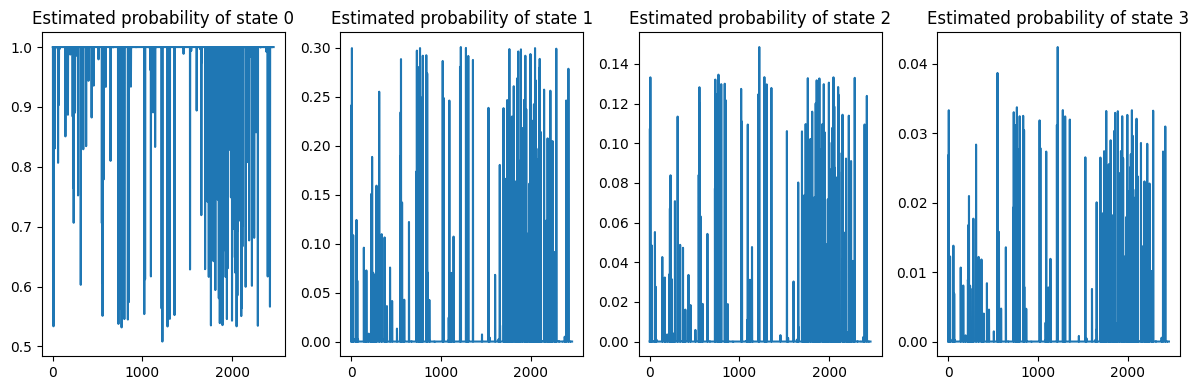

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -97240.023 Change: 0.999


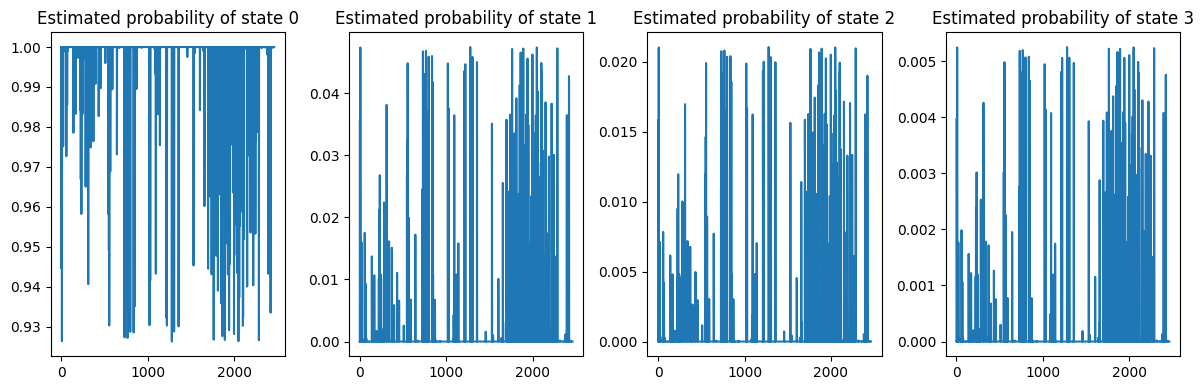

Iteration: 1
Log-likelihood: -3560.9984 Change: 0.9634


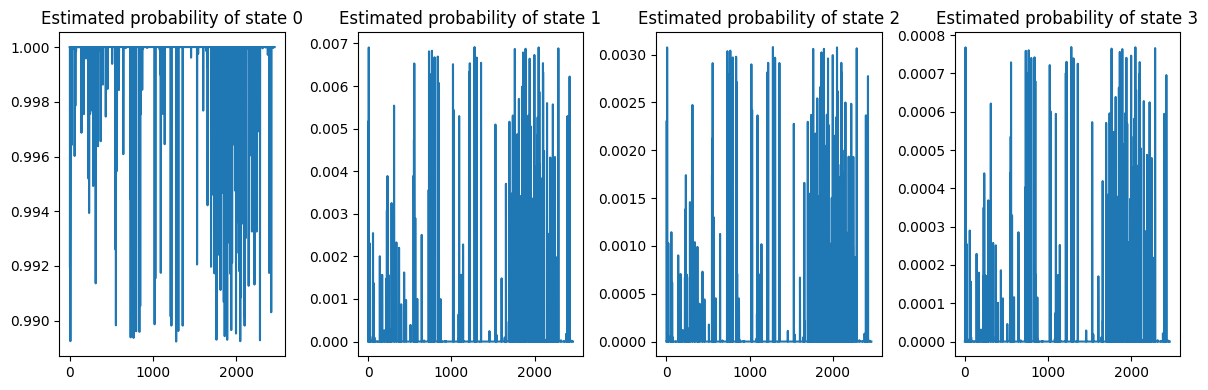

Iteration: 2
Log-likelihood: -3504.4383 Change: 0.0159


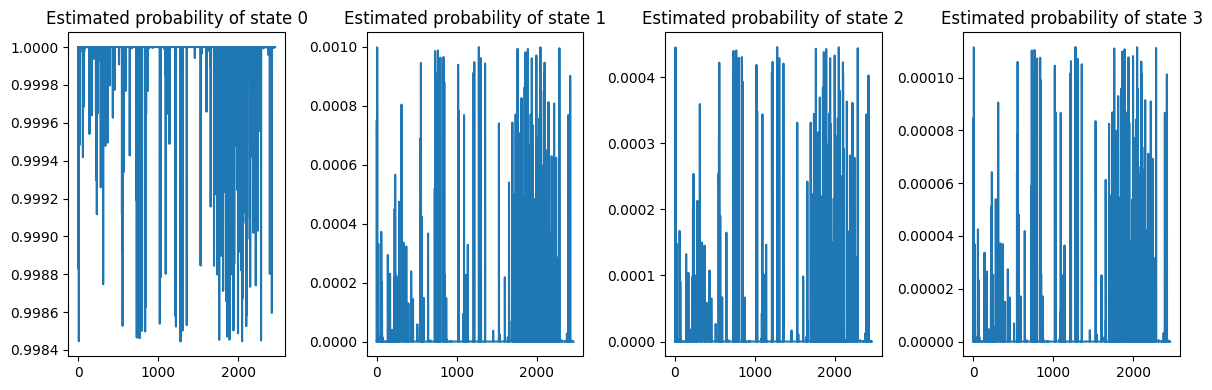

Iteration: 3
Log-likelihood: -3496.234 Change: 0.0023


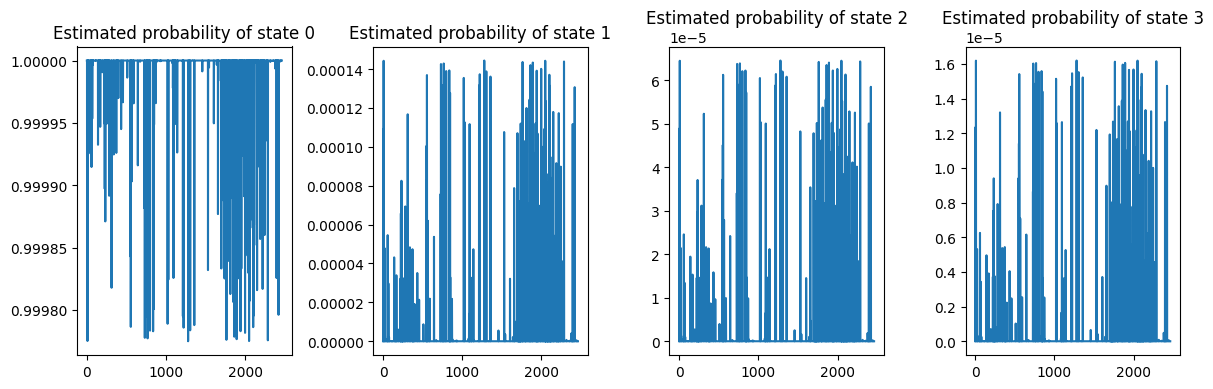

Iteration: 4
Log-likelihood: -3495.0467 Change: 0.0003


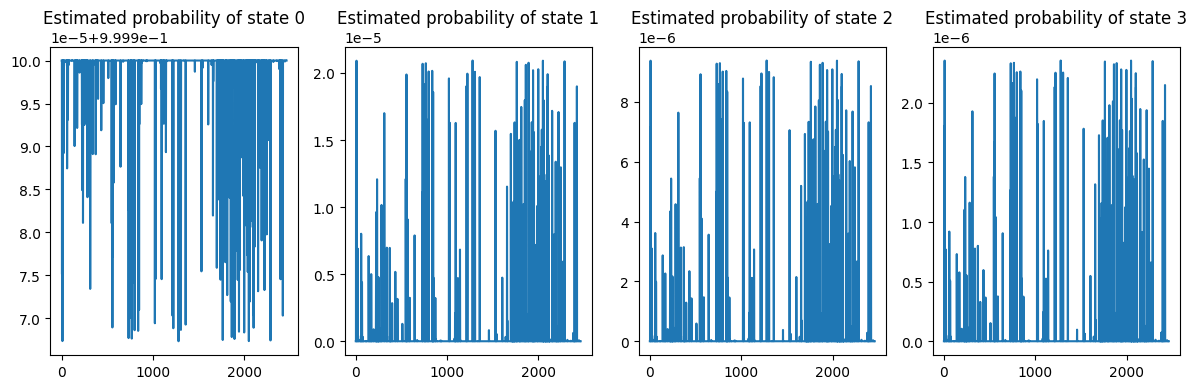

Iteration: 5
Log-likelihood: -3494.8748 Change: 0.0
Final estimates:
Log-Likelihood: -3494.8748 Akaike: 7045.7496 Schwarz: 7208.4054
Mu: [0.466  1.9587 1.9582 1.9571]
Sigma: [0.8123 0.1315 0.1318 0.1319]
Transition Matrix:
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
Initial probabilities: [1. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 4  # Number of states

# Set initial guesses
mu_hat0 = np.array([2, 2, 2, 2])  # Mean guesses for 4 states
sigma_hat0 = np.array([0.2, 0.1, 0.1, 0.1])  # Standard deviation guesses for 4 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.4
P_hat0[0, 1] = 0.3
P_hat0[0, 2] = 0.2
P_hat0[0, 3] = 0.1
P_hat0[1, 0] = 0.3
P_hat0[1, 1] = 0.4
P_hat0[1, 2] = 0.2
P_hat0[1, 3] = 0.1
P_hat0[2, 0] = 0.2
P_hat0[2, 1] = 0.3
P_hat0[2, 2] = 0.4
P_hat0[2, 3] = 0.1
P_hat0[3, 0] = 0.1
P_hat0[3, 1] = 0.2
P_hat0[3, 2] = 0.3
P_hat0[3, 3] = 0.4

# Ensure rows sum to 1
P_hat0 = P_hat0 / P_hat0.sum(axis=1, keepdims=True)

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.1875,0.3125,0.3125,0.1875])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(12, 4))
    for i in range(N):
        plt.subplot(1, 4, i + 1)
        plt.plot(xi_prob_T[:, i])
        plt.title(f"Estimated probability of state {i}")

    plt.tight_layout()
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


### **(iv) Different "mu" and different sigma**

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

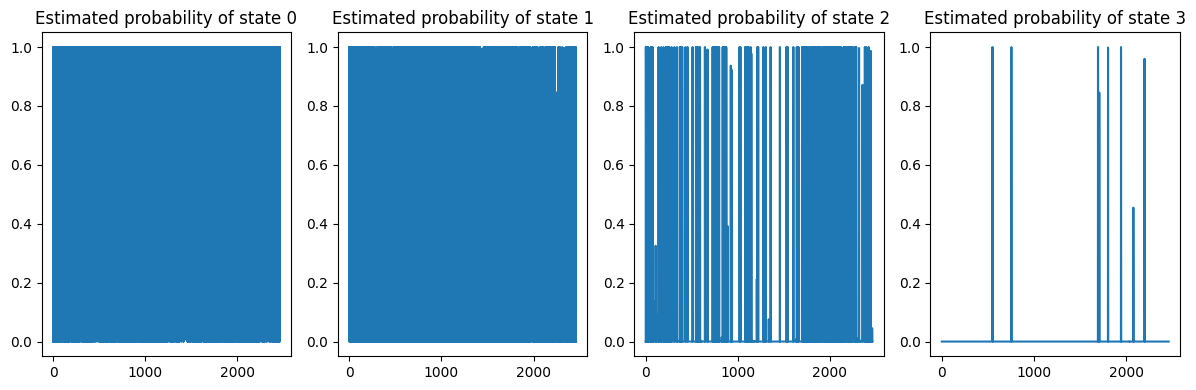

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -15074.413 Change: 0.9998


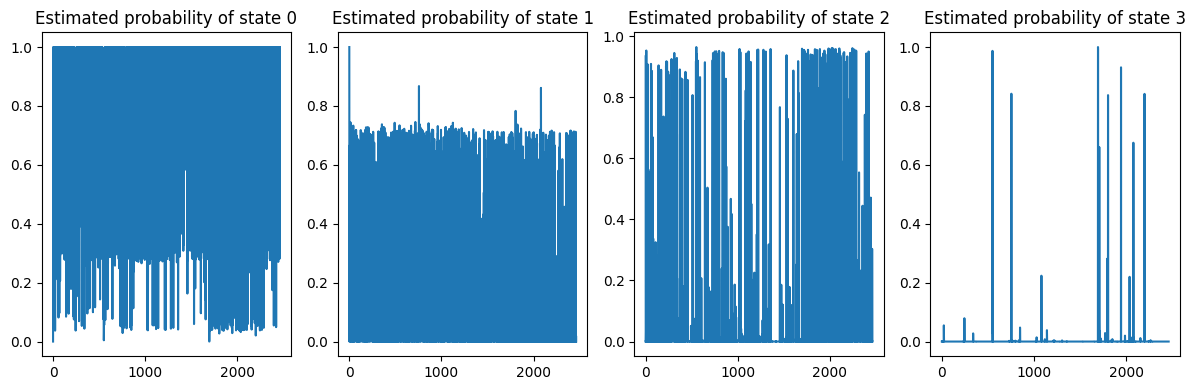

Iteration: 1
Log-likelihood: -5108.6104 Change: 0.6611


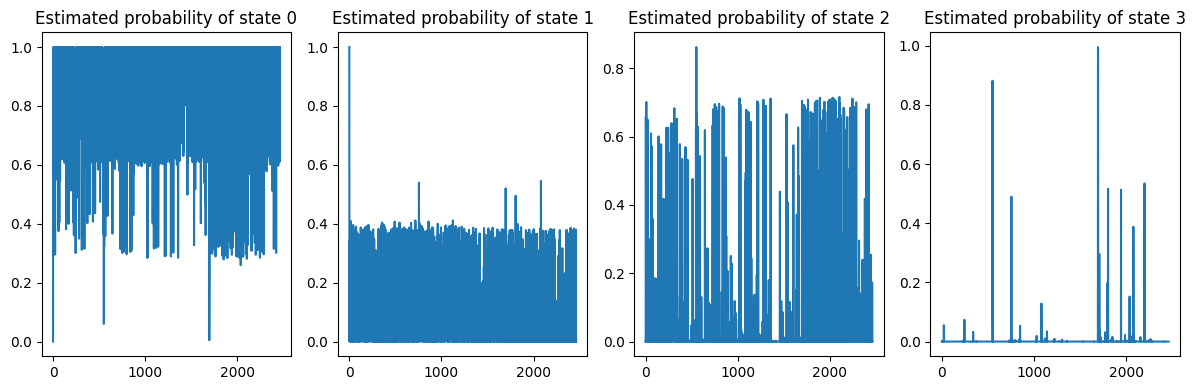

Iteration: 2
Log-likelihood: -4409.7458 Change: 0.1368


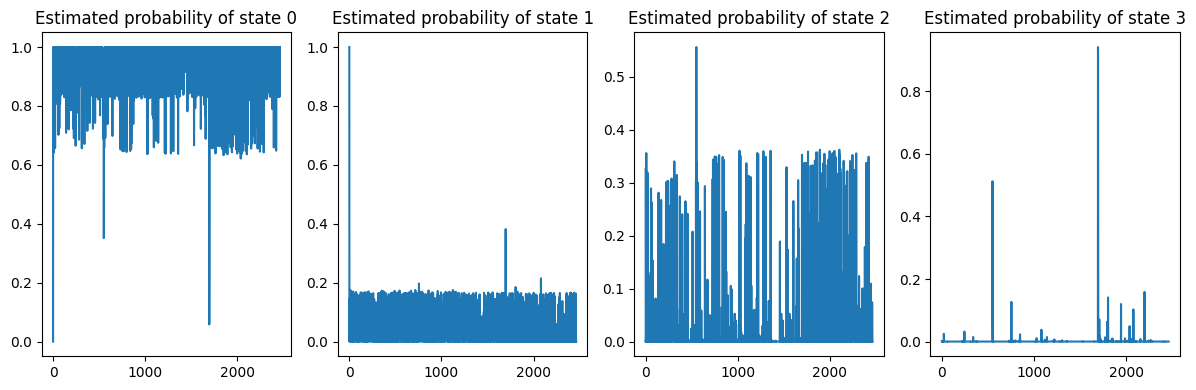

Iteration: 3
Log-likelihood: -3937.9969 Change: 0.107


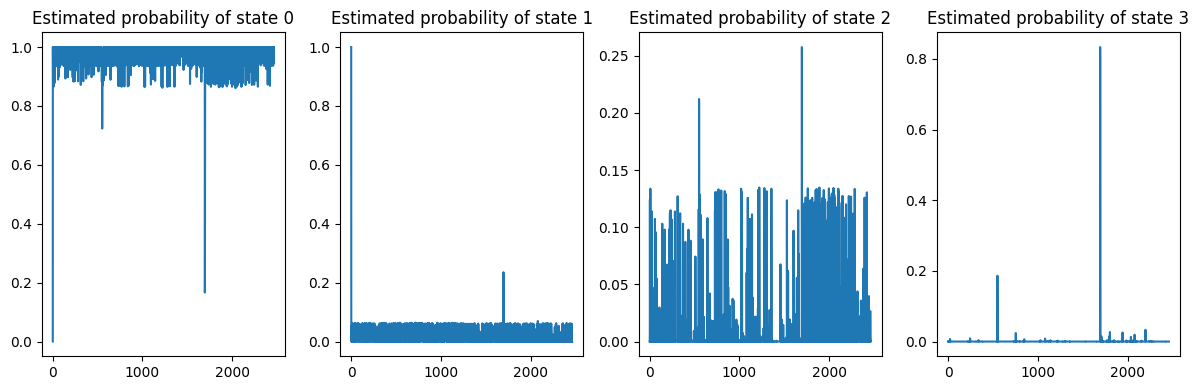

Iteration: 4
Log-likelihood: -3670.2257 Change: 0.068


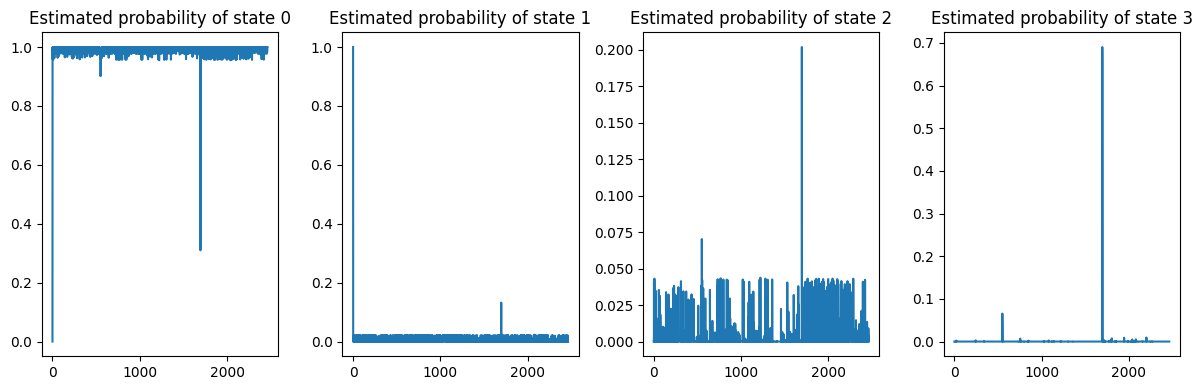

Iteration: 5
Log-likelihood: -3558.4765 Change: 0.0304


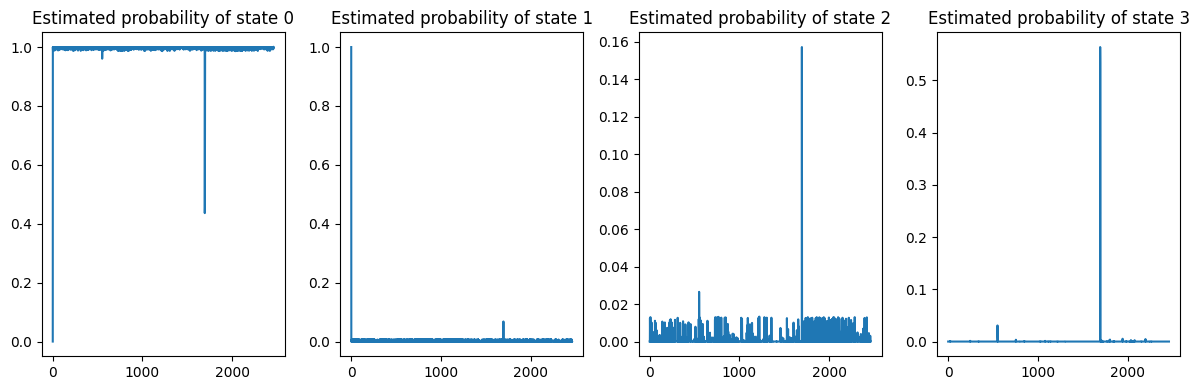

Iteration: 6
Log-likelihood: -3518.9953 Change: 0.0111


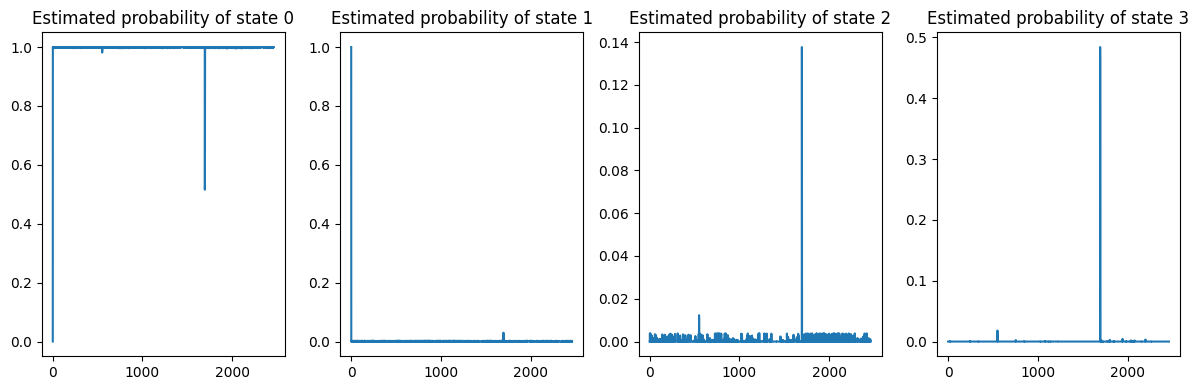

Iteration: 7
Log-likelihood: -3505.5052 Change: 0.0038


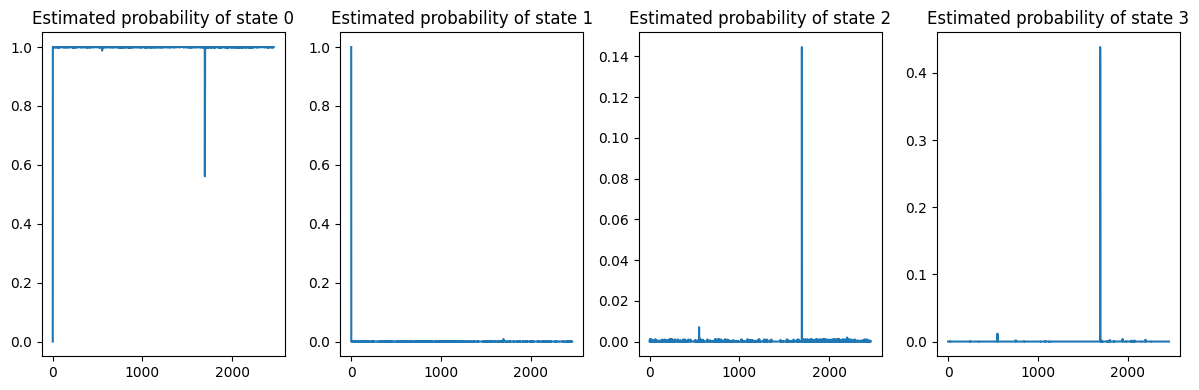

Iteration: 8
Log-likelihood: -3500.7874 Change: 0.0013


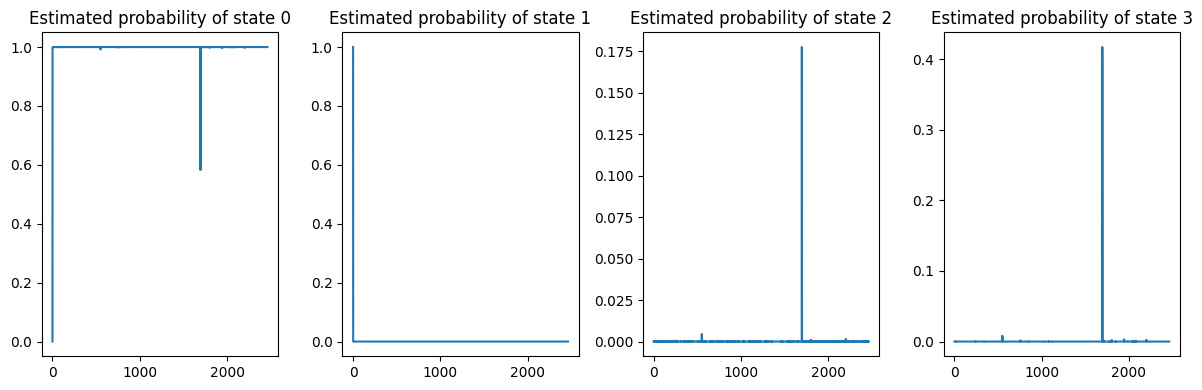

Iteration: 9
Log-likelihood: -3498.9954 Change: 0.0005


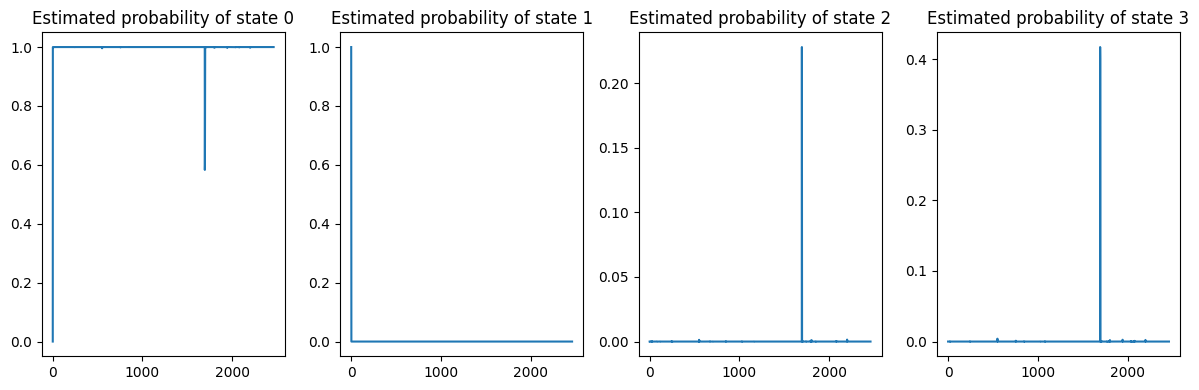

Iteration: 10
Log-likelihood: -3498.3088 Change: 0.0002


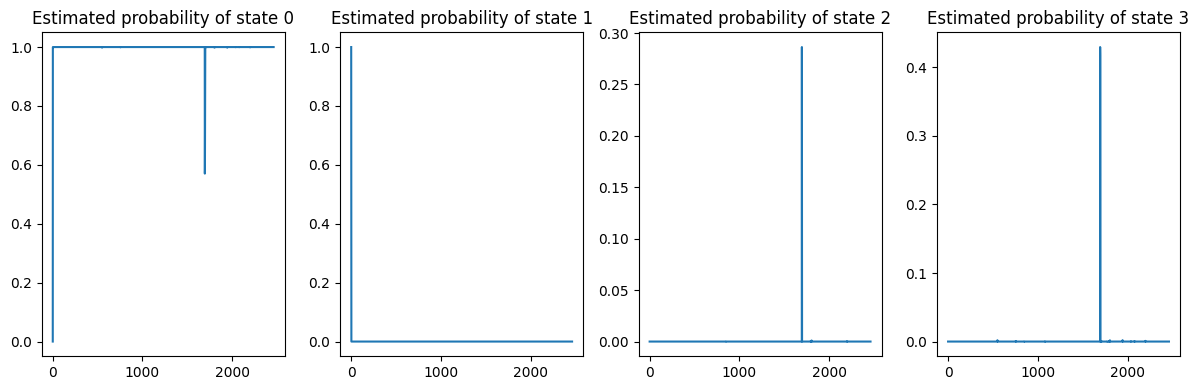

Iteration: 11
Log-likelihood: -3498.1515 Change: 0.0
Final estimates:
Log-Likelihood: -3498.1515 Akaike: 7052.303 Schwarz: 7214.9588
Mu: [0.4648 1.0985 1.411  3.0194]
Sigma: [0.8111 0.0011 0.0801 0.4398]
Transition Matrix:
[9.998e-01 0.000e+00 0.000e+00 2.000e-04]
[1. 0. 0. 0.]
[9.991e-01 0.000e+00 9.000e-04 0.000e+00]
[0.2452 0.     0.2784 0.4764]
Initial probabilities: [0. 1. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 4  # Number of states

# Set initial guesses
mu_hat0 = np.array([0, 1, 2, 3])  # Mean guesses for 4 states
sigma_hat0 = np.array([0.2, 0.1, 0.1, 0.1])  # Standard deviation guesses for 4 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.4
P_hat0[0, 1] = 0.3
P_hat0[0, 2] = 0.2
P_hat0[0, 3] = 0.1
P_hat0[1, 0] = 0.3
P_hat0[1, 1] = 0.4
P_hat0[1, 2] = 0.2
P_hat0[1, 3] = 0.1
P_hat0[2, 0] = 0.2
P_hat0[2, 1] = 0.3
P_hat0[2, 2] = 0.4
P_hat0[2, 3] = 0.1
P_hat0[3, 0] = 0.1
P_hat0[3, 1] = 0.2
P_hat0[3, 2] = 0.3
P_hat0[3, 3] = 0.4

# Ensure rows sum to 1
P_hat0 = P_hat0 / P_hat0.sum(axis=1, keepdims=True)

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.1875,0.3125,0.3125,0.1875])  # Initial probabilities for each state
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(12, 4))
    for i in range(N):
        plt.subplot(1, 4, i + 1)
        plt.plot(xi_prob_T[:, i])
        plt.title(f"Estimated probability of state {i}")

    plt.tight_layout()
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))  # Properly indented this line
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                # Calculate the scalar values for each element of P_hat_T
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2] * xi_prob_t[tt - 1, ss] *
                    xi_prob_T[tt, ss2] / (xi_prob_t1[tt - 1, ss2])
                )

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T - 1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))

        break  # Ensure this break is properly indented within the else block


##**Step 3 Performance of different Model architectures (AIC and BIC)**

### **(a) Model with different mu**

In [ ]:
# Log likelihood
def log_likelihood(x_prob, T, pi_hat0, P, mu, sigma, Y):
    y_like = np.zeros(T)
    for tt in range(0, T):
        y_like[tt] = likelihood(x_prob[tt, :], mu, sigma, Y[tt])  # Fix assignment operator

    sum_log_like = np.sum(np.log(y_like))  # Compute sum of log likelihoods
    k = (np.prod(mu.shape) + np.prod(sigma.shape))
    k += (np.prod(pi_hat0.shape) + np.prod(P.shape))  # Number of parameters (k)

    n = len(Y)  # Number of observations
    akaike = 2 * k - 2 * sum_log_like  # Akaike information criterion (AIC)
    schwarz = k * np.log(n) - 2 * sum_log_like  # Schwarz criterion (BIC)

    return sum_log_like, akaike, schwarz


<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

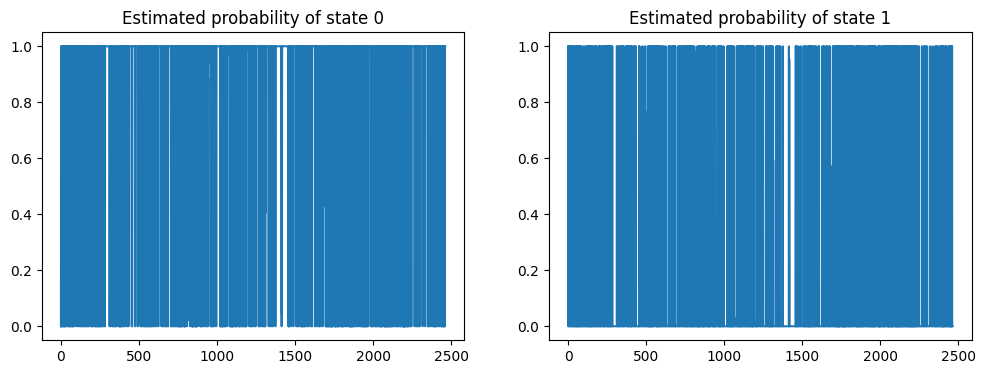

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -59128.6245 Change: 0.9994


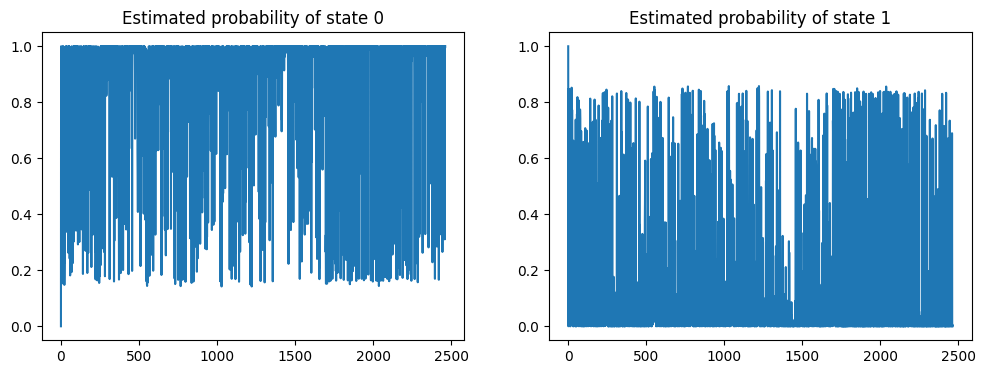

Iteration: 1
Log-likelihood: -4432.8193 Change: 0.925


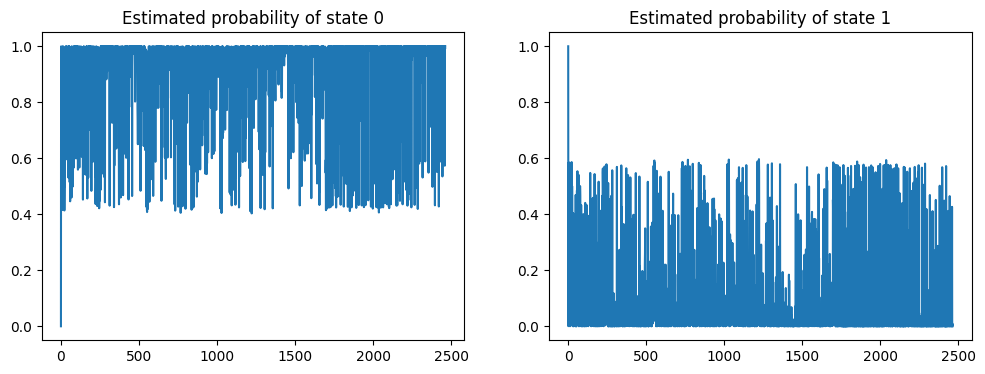

Iteration: 2
Log-likelihood: -3989.2933 Change: 0.1001


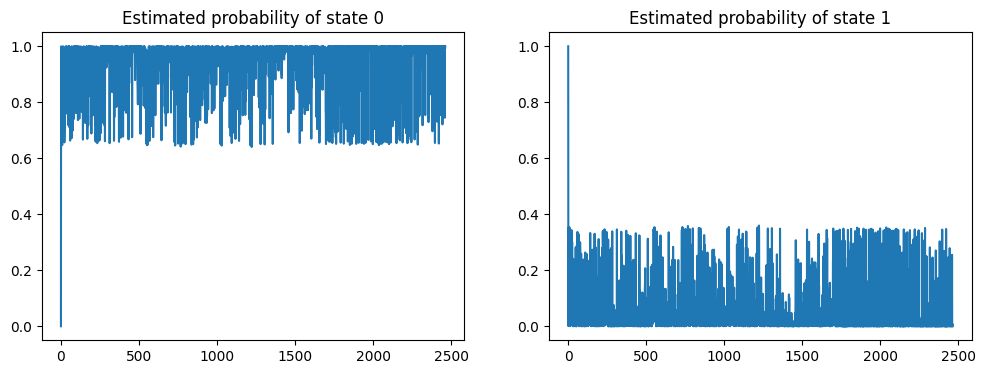

Iteration: 3
Log-likelihood: -3763.6252 Change: 0.0566


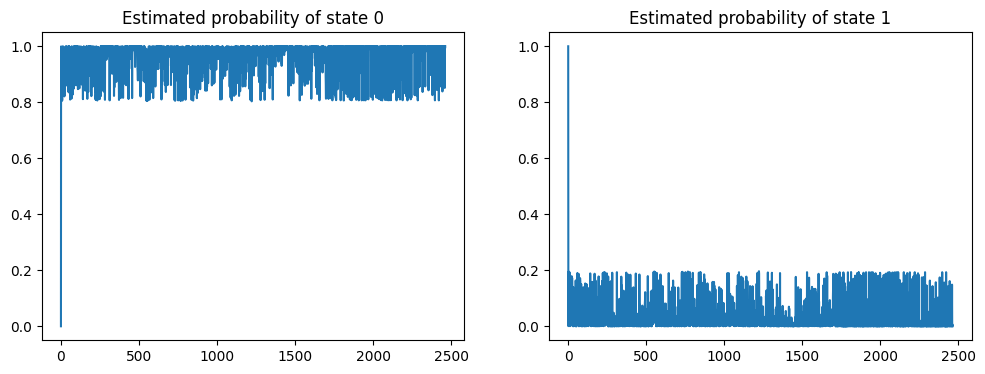

Iteration: 4
Log-likelihood: -3637.8606 Change: 0.0334


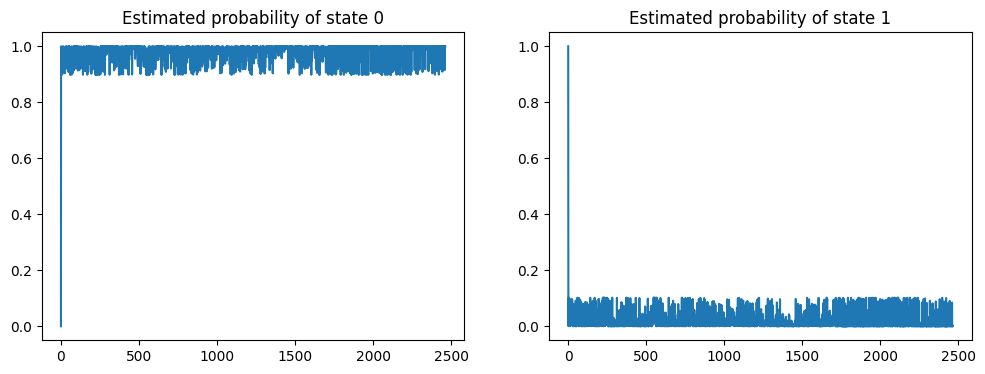

Iteration: 5
Log-likelihood: -3569.3455 Change: 0.0188


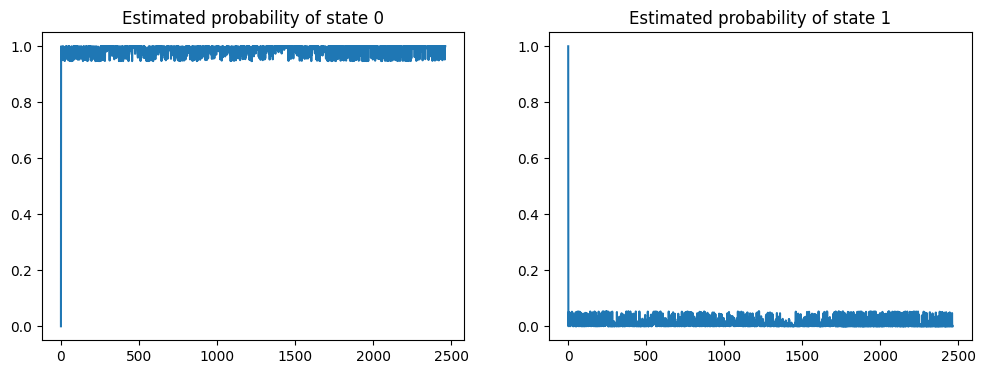

Iteration: 6
Log-likelihood: -3533.0911 Change: 0.0102


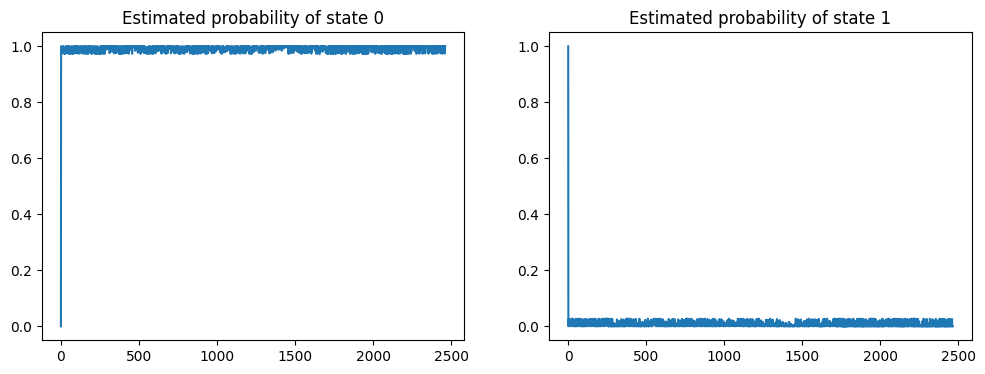

Iteration: 7
Log-likelihood: -3514.2287 Change: 0.0053


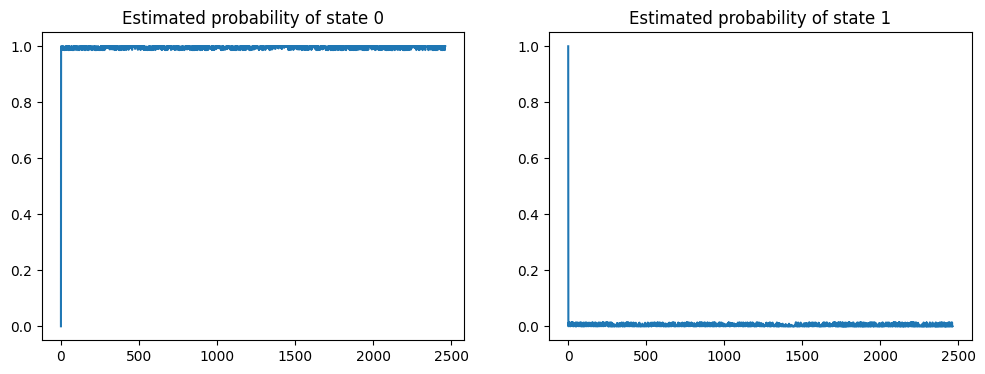

Iteration: 8
Log-likelihood: -3504.4945 Change: 0.0028


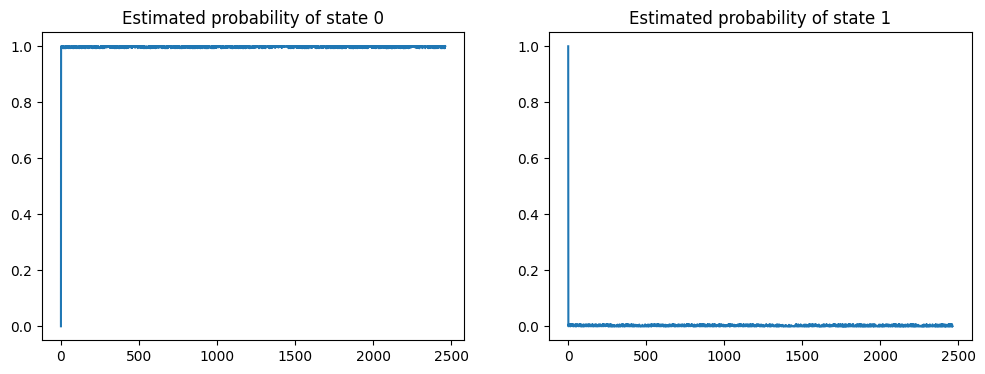

Iteration: 9
Log-likelihood: -3499.4942 Change: 0.0014


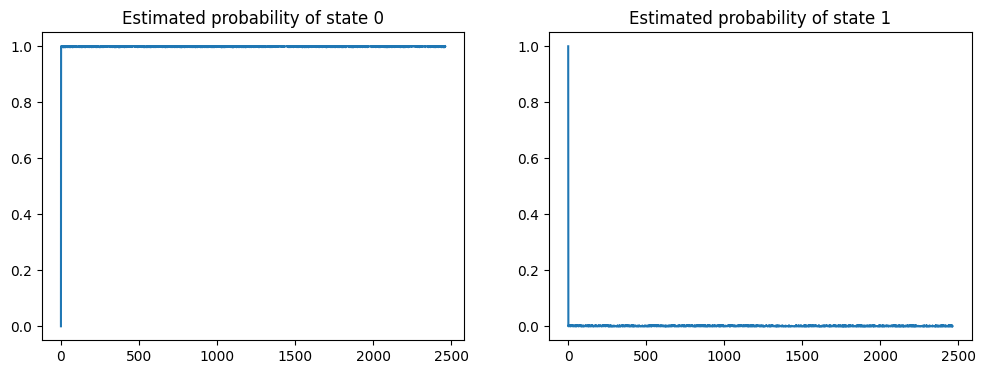

Iteration: 10
Log-likelihood: -3496.9355 Change: 0.0007


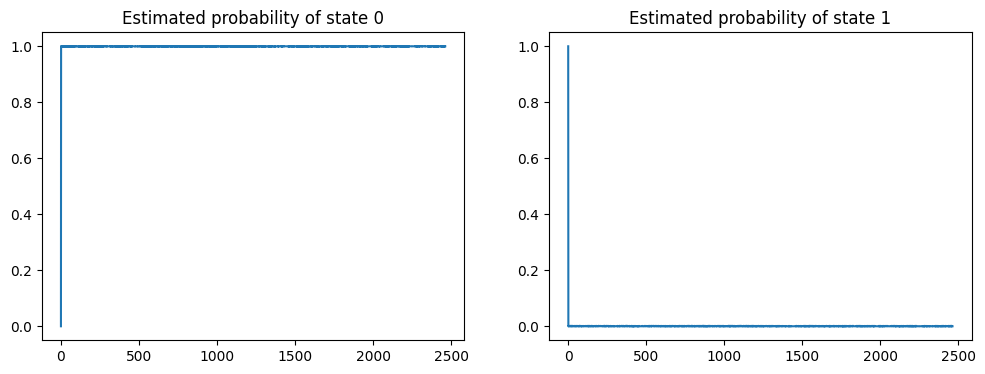

Iteration: 11
Log-likelihood: -3495.6248 Change: 0.0004


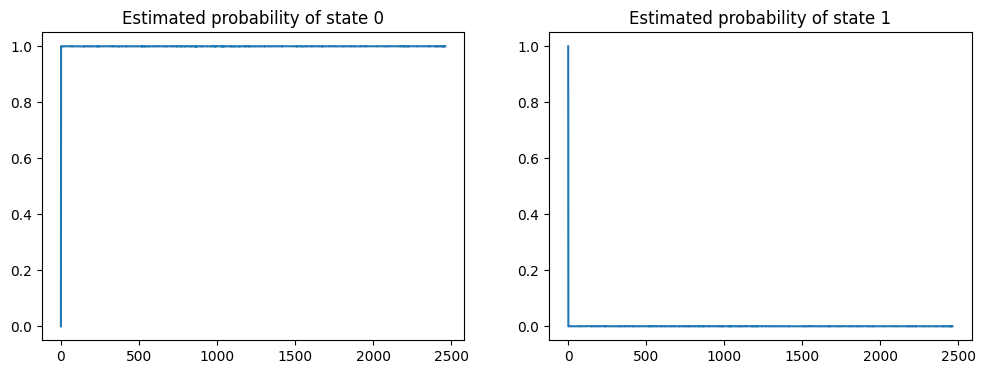

Iteration: 12
Log-likelihood: -3494.9357 Change: 0.0002


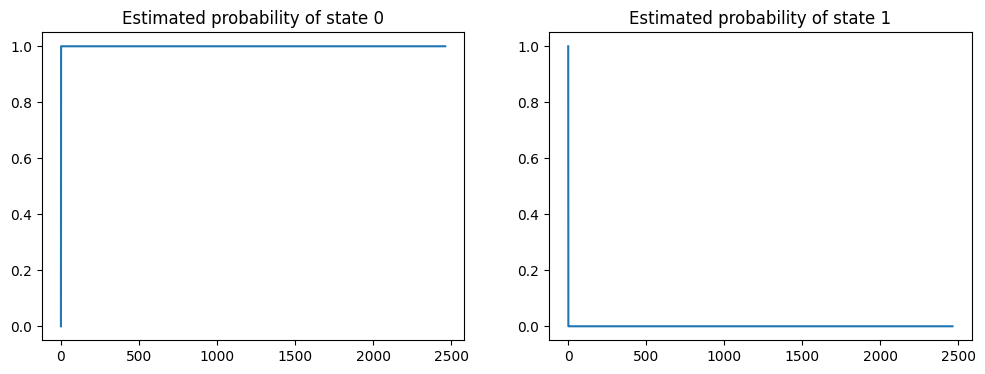

Iteration: 13
Log-likelihood: -3494.5546 Change: 0.0001


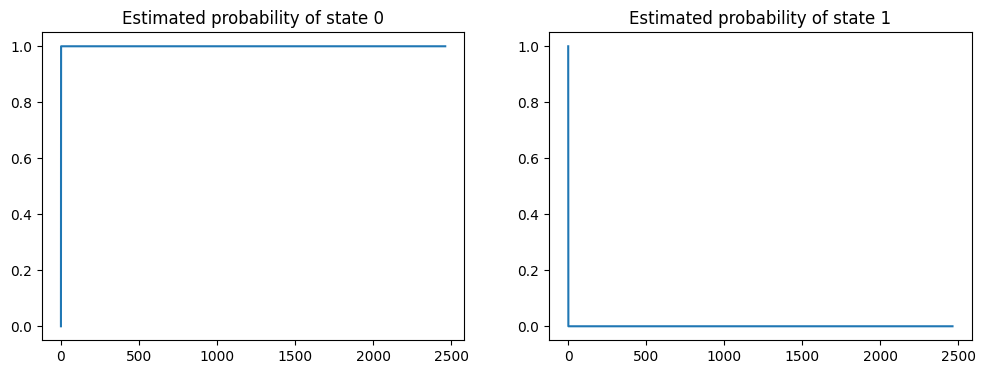

Iteration: 14
Log-likelihood: -3494.3807 Change: 0.0
Final estimates:
Log-Likelihood: -3494.3807 Akaike: 7008.7615 Schwarz: 7066.8528
Mu: [0.4658 1.0977]
Sigma: [0.8124 0.0233]
Transition Matrix:
[1. 0.]
[1. 0.]
Initial probabilities: [0. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 2

# Set initial guesses
mu_hat0 = np.array([0, 2])  # Mean guesses for 2 states
sigma_hat0 = np.array([0.1, 0.1])  # Standard deviation guesses for 2 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.5, 0.5])  # Initial probabilities for each state

# Compute stationary distribution using the transition matrix
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    if xi_prob_t is None or xi_prob_t1 is None:
        raise ValueError("The forward algorithm did not return valid probabilities.")

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")

    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                P_hat_T[ss, ss2, tt] = (P_hat0[ss, ss2] * xi_prob_t[tt-1, ss] *
                                        xi_prob_T[tt, ss2] / xi_prob_t1[tt-1, ss2])

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))
        break


### **(b) Model with different sigma**

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

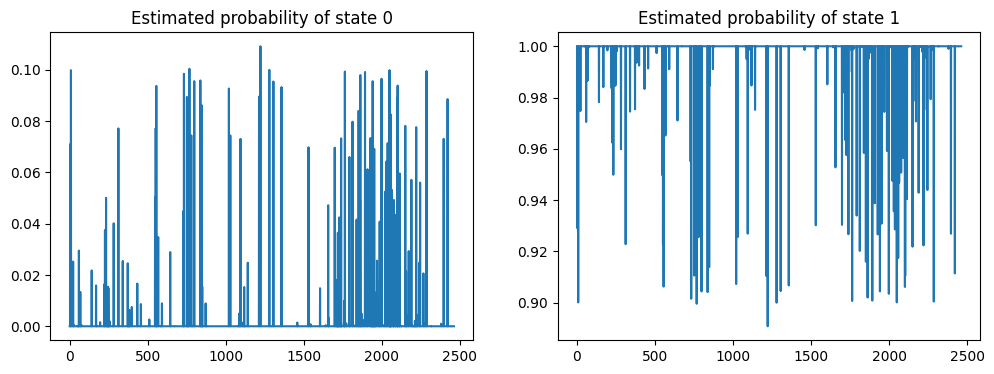

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -95723.5531 Change: 0.999


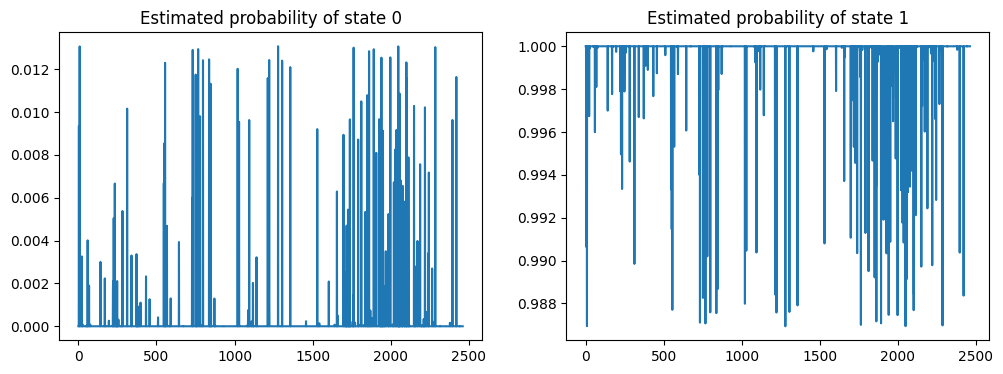

Iteration: 1
Log-likelihood: -3506.7135 Change: 0.9634


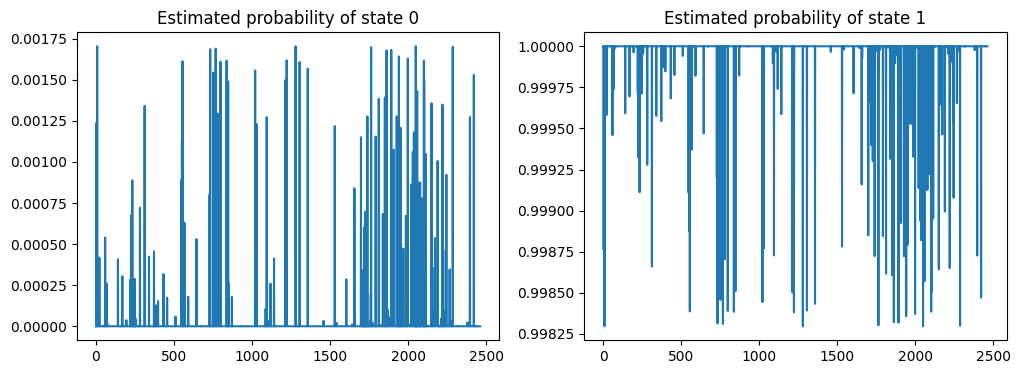

Iteration: 2
Log-likelihood: -3496.3824 Change: 0.0029


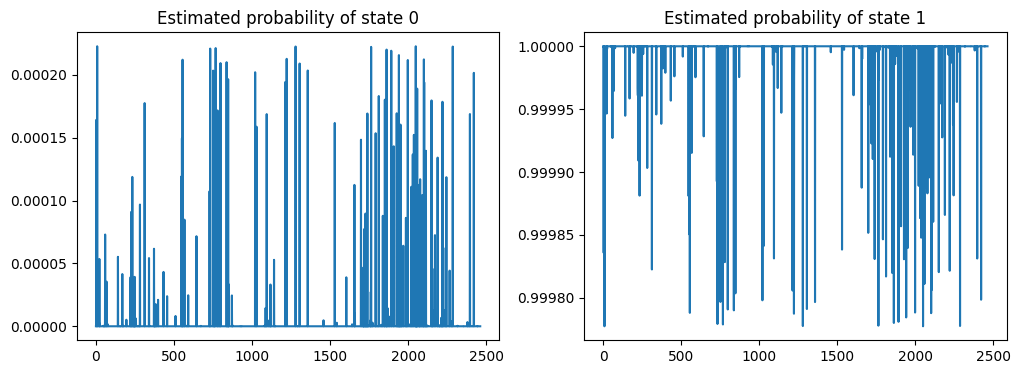

Iteration: 3
Log-likelihood: -3495.0469 Change: 0.0004


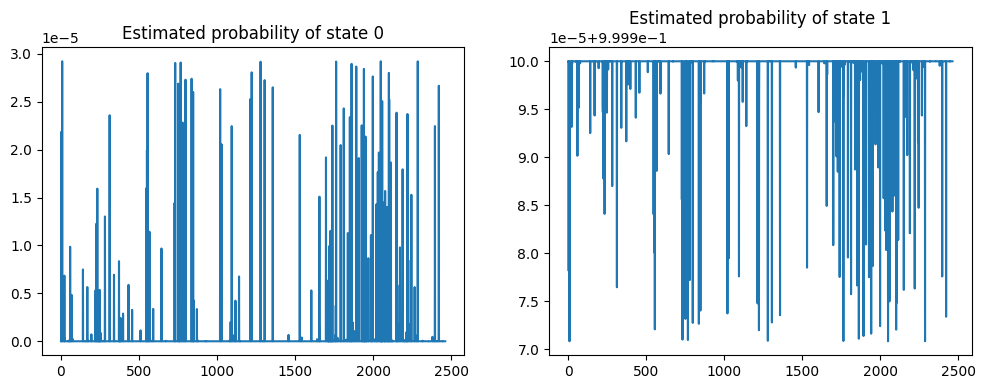

Iteration: 4
Log-likelihood: -3494.8721 Change: 0.0001
Final estimates:
Log-Likelihood: -3494.8721 Akaike: 7009.7441 Schwarz: 7067.8355
Mu: [1.959 0.466]
Sigma: [0.1193 0.8123]
Transition Matrix:
[0. 1.]
[0. 1.]
Initial probabilities: [0. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 2

# Set initial guesses
mu_hat0 = np.array([2, 2])  # Mean guesses for 2 states
sigma_hat0 = np.array([0.1, 0.2])  # Standard deviation guesses for 2 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.5, 0.5])  # Initial probabilities for each state

# Compute stationary distribution using the transition matrix
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    if xi_prob_t is None or xi_prob_t1 is None:
        raise ValueError("The forward algorithm did not return valid probabilities.")

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")

    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                P_hat_T[ss, ss2, tt] = (P_hat0[ss, ss2] * xi_prob_t[tt-1, ss] *
                                        xi_prob_T[tt, ss2] / xi_prob_t1[tt-1, ss2])

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))
        break


### **(c) Model with different mu and sigma**

<ipython-input-172-91da0af7ba2f>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(pi_hat0, mu, sigma, Y[0])
<ipython-input-172-91da0af7ba2f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-172-91da0af7ba2f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
<ipython-input-172-91da0af7ba

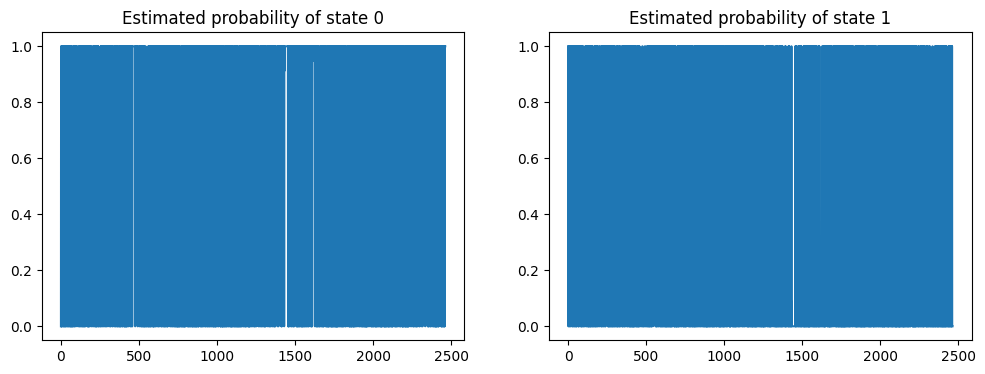

<ipython-input-171-d45021441910>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like[tt] = likelihood(xi_prob[tt, :], mu, sigma, Y[tt])


Iteration: 0
Log-likelihood: -41328.4935 Change: 0.9996


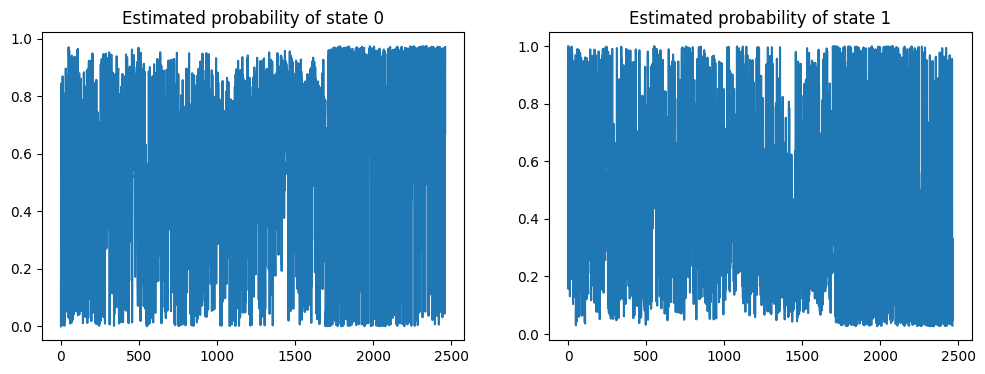

Iteration: 1
Log-likelihood: -4440.4317 Change: 0.8926


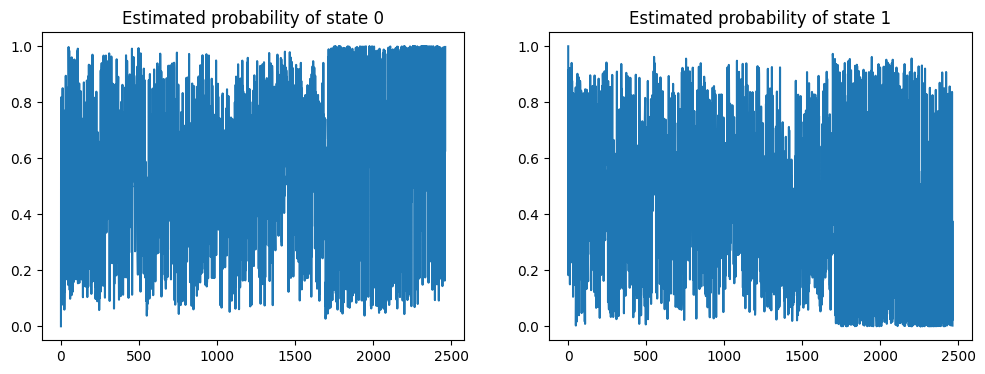

Iteration: 2
Log-likelihood: -4047.5872 Change: 0.0885


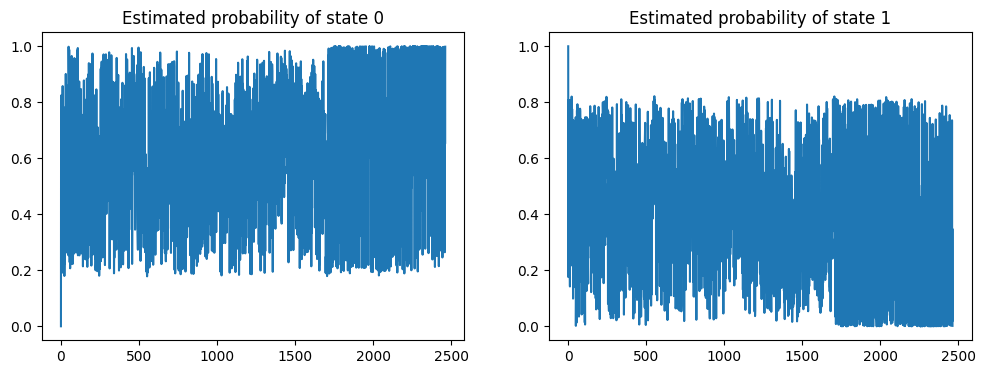

Iteration: 3
Log-likelihood: -3928.8468 Change: 0.0293


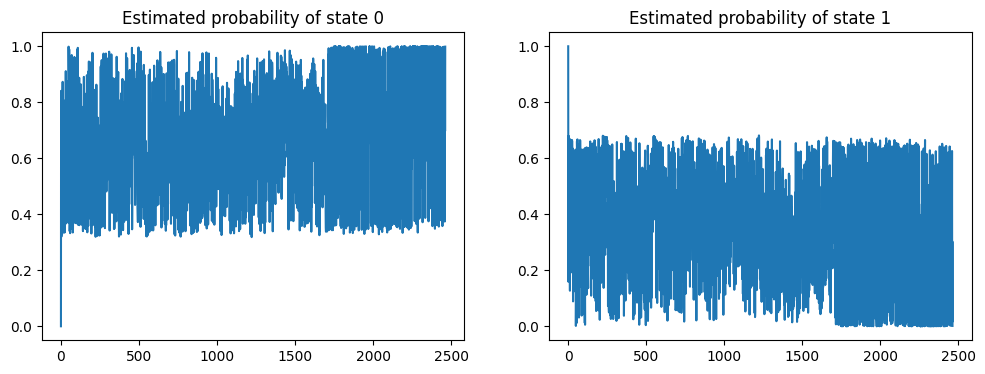

Iteration: 4
Log-likelihood: -3827.2115 Change: 0.0259


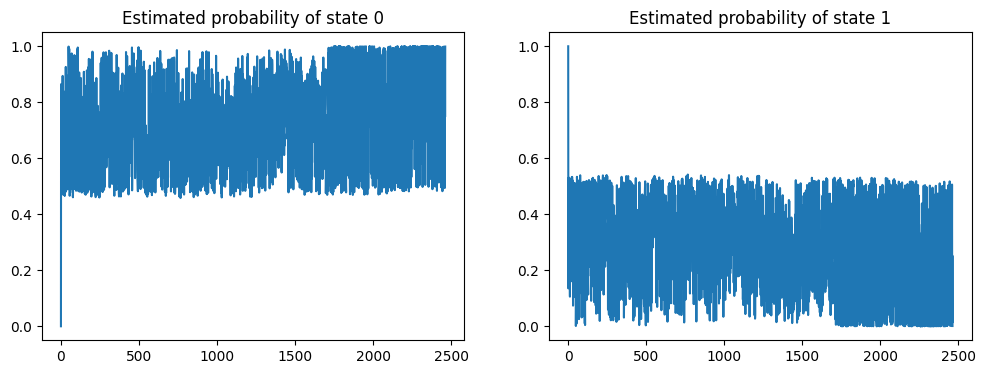

Iteration: 5
Log-likelihood: -3737.9253 Change: 0.0233


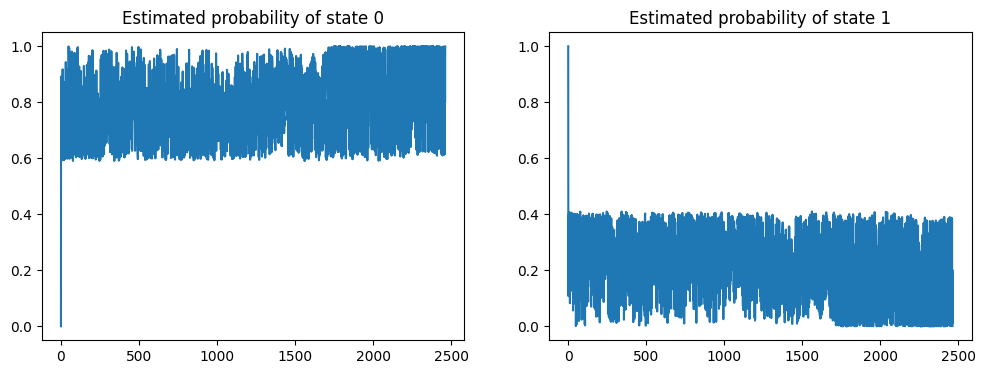

Iteration: 6
Log-likelihood: -3663.5385 Change: 0.0199


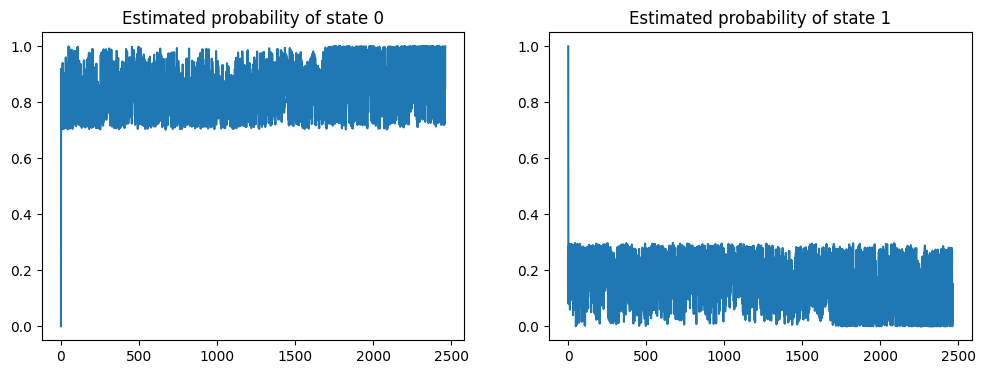

Iteration: 7
Log-likelihood: -3606.5234 Change: 0.0156


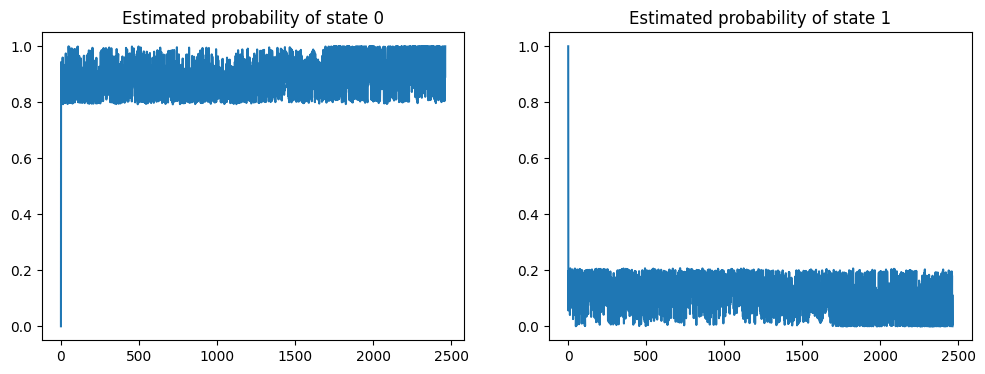

Iteration: 8
Log-likelihood: -3566.3508 Change: 0.0111


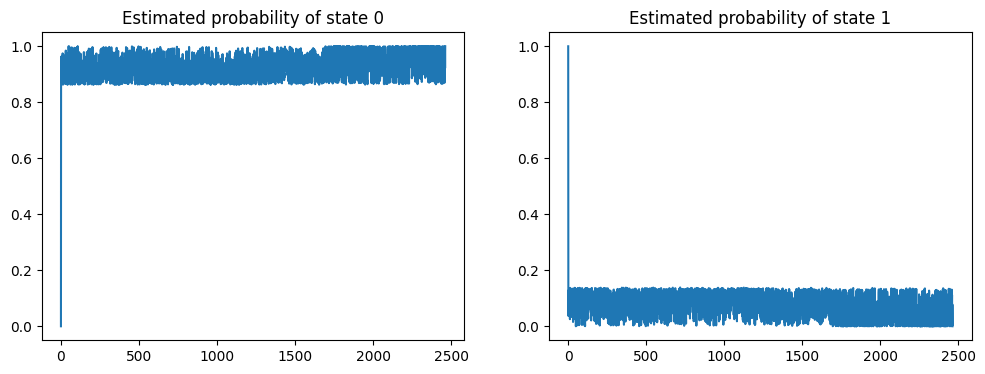

Iteration: 9
Log-likelihood: -3539.7179 Change: 0.0075


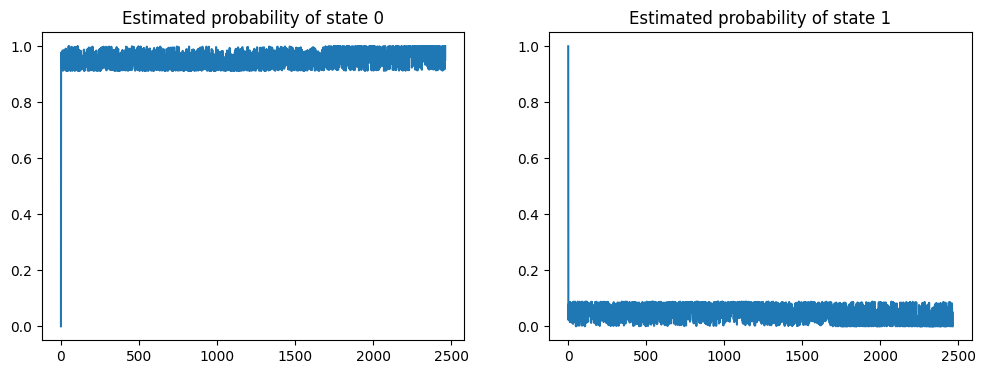

Iteration: 10
Log-likelihood: -3522.6344 Change: 0.0048


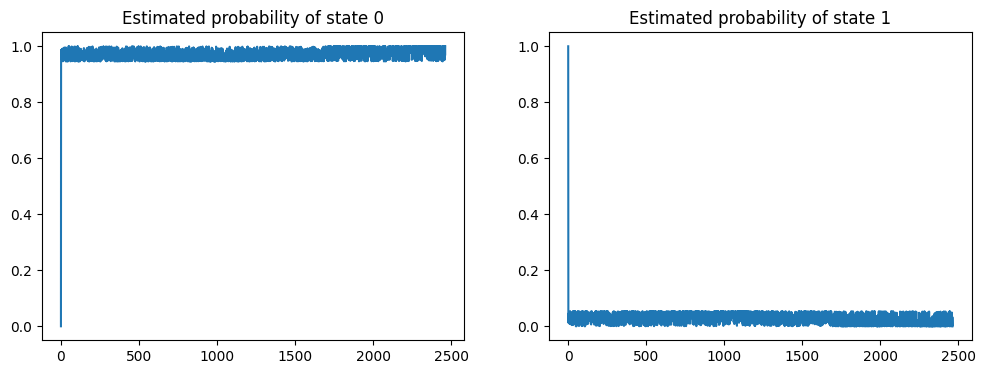

Iteration: 11
Log-likelihood: -3511.8291 Change: 0.0031


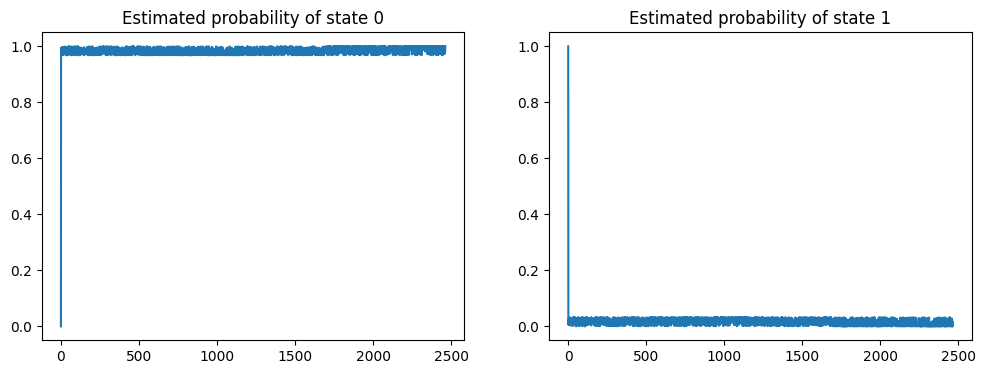

Iteration: 12
Log-likelihood: -3505.046 Change: 0.0019


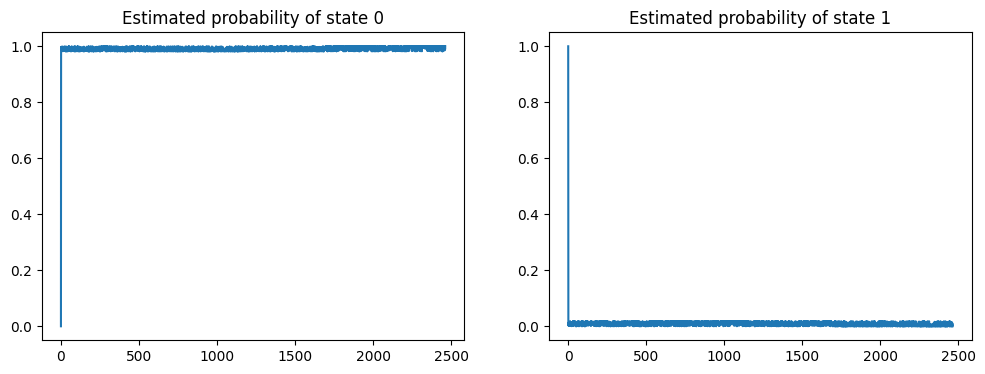

Iteration: 13
Log-likelihood: -3500.8328 Change: 0.0012


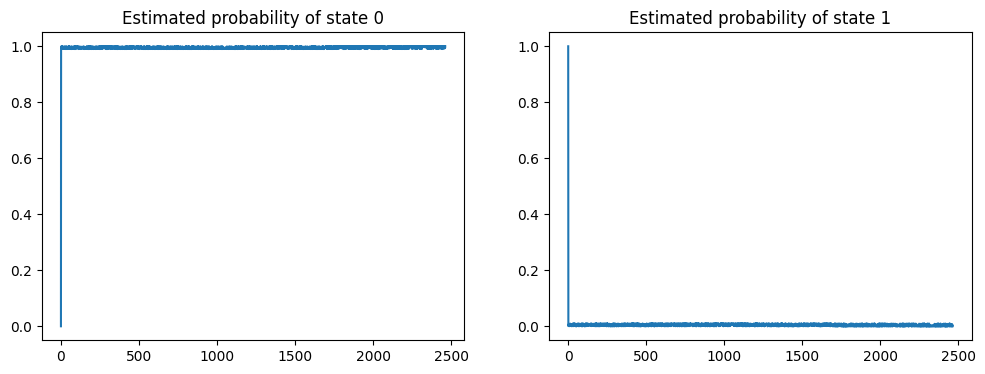

Iteration: 14
Log-likelihood: -3498.2612 Change: 0.0007


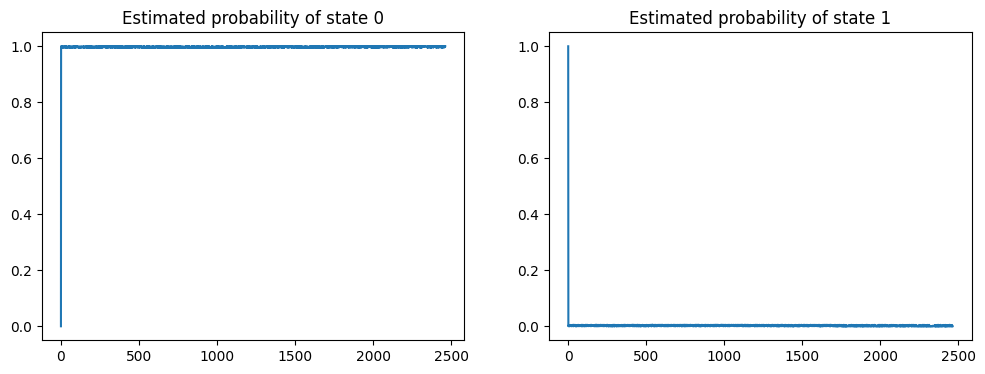

Iteration: 15
Log-likelihood: -3496.7228 Change: 0.0004


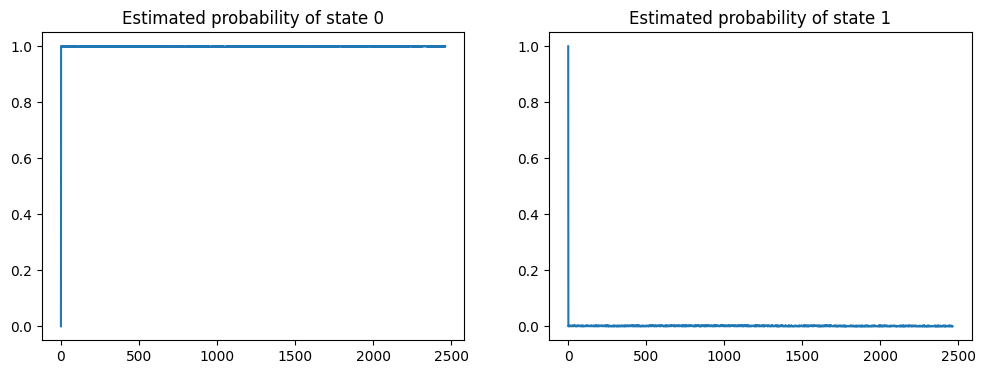

Iteration: 16
Log-likelihood: -3495.8082 Change: 0.0003


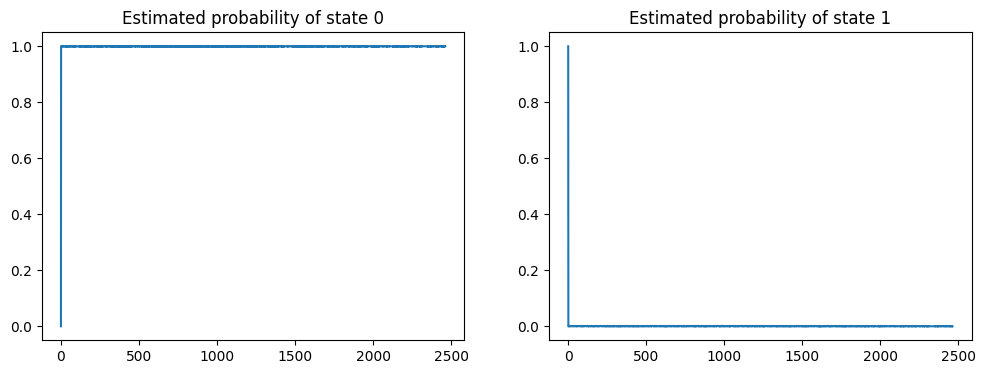

Iteration: 17
Log-likelihood: -3495.2464 Change: 0.0002


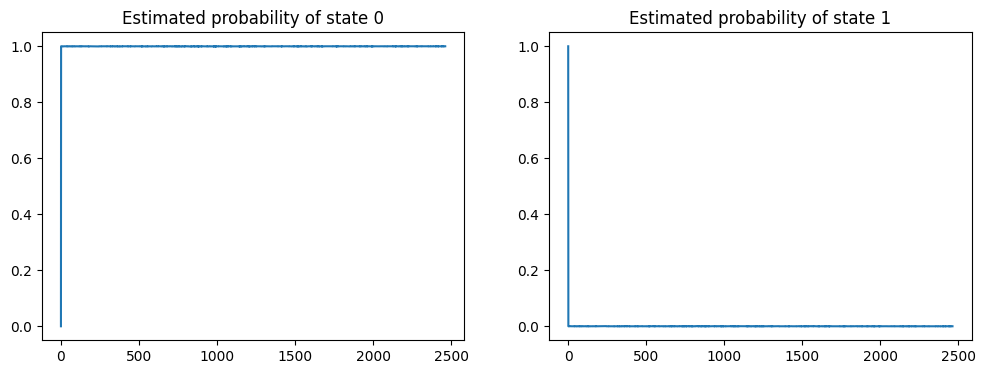

Iteration: 18
Log-likelihood: -3494.8696 Change: 0.0001


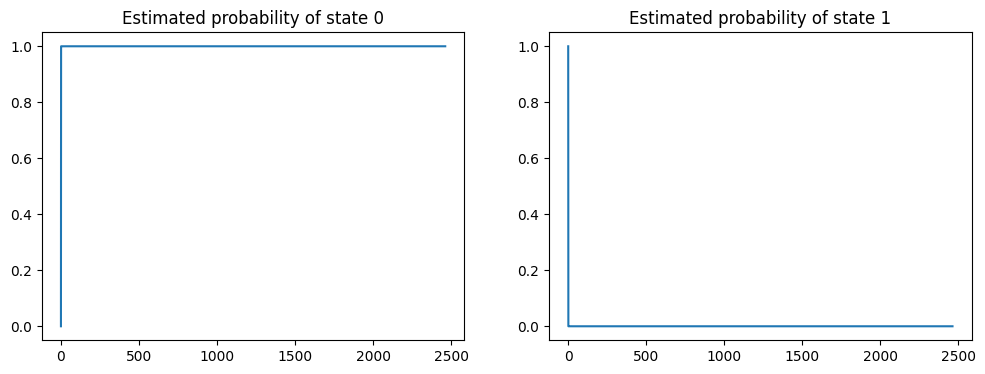

Iteration: 19
Log-likelihood: -3494.5833 Change: 0.0001
Final estimates:
Log-Likelihood: -3494.5833 Akaike: 7009.1667 Schwarz: 7067.258
Mu: [0.4657 1.0595]
Sigma: [0.8124 0.1445]
Transition Matrix:
[9.998e-01 2.000e-04]
[1. 0.]
Initial probabilities: [0. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = len(df)
N = 2

# Set initial guesses
mu_hat0 = np.array([0, 2])  # Mean guesses for 2 states
sigma_hat0 = np.array([0.1, 0.2])  # Standard deviation guesses for 2 states
P_hat0 = np.zeros((N, N))  # Transition probability matrix

# Transition matrix initialization
P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Set initial probabilities and stationary distribution
pi_hat0 = np.array([0.5, 0.5])  # Initial probabilities for each state

# Compute stationary distribution using the transition matrix
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0 = -1e8

# Start the iteration loop
for ite in range(itemax):
    # Call forward algorithm (ensure forward_alg is defined properly)
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    if xi_prob_t is None or xi_prob_t1 is None:
        raise ValueError("The forward algorithm did not return valid probabilities.")

    # Call backward algorithm (ensure backward_alg is defined properly)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")

    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.show()

    # Compute Pr(s_t+1=j, s_t=i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                P_hat_T[ss, ss2, tt] = (P_hat0[ss, ss2] * xi_prob_t[tt-1, ss] *
                                        xi_prob_T[tt, ss2] / xi_prob_t1[tt-1, ss2])

    # New: Instead of checking estimates, only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(
        np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])),
        T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df
    )

    # Calculate the difference in log-likelihood between iterations
    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    # Stop when the difference in the likelihood between steps is small
    if diff > itetol:
        # M-step (assuming you have an M_step_func function)
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        # Final estimates
        print("Final estimates:")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial probabilities:", np.round(pi_hat0, 4))
        break


In [ ]:
import numpy as np

# Assuming Y is a pandas Series containing the data
def run_algorithm(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, Y):
    # Call forward algorithm
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, Y
    )

    # Call backward algorithm
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0)

    # Initialize likelihood
    # Use iloc for positional indexing (assuming 'Y' is a pandas Series)
    y_like, phi = likelihood(pi_hat0, mu_hat0, sigma_hat0, Y.iloc[0])

    # Loop over time steps
    for tt in range(1, T):
        # Use iloc for positional indexing to avoid FutureWarning in pandas
        y_like, phi = likelihood(
            xi_prob_t1[tt - 1, :], mu_hat0, sigma_hat0, Y.iloc[tt]
        )

    return xi_prob_T, y_like, phi


In [ ]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [0, 4] * np.ones((N))
sigma_hat0 = [0.1, 0.1] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]
#Set as intitial probability the stationary distribution
pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-4
log_like0=-1e8


In [ ]:
# Initialize parameters
T = len(df)
N = 4

# SET INITIAL GUESSES
mu_hat0 = [-0.1, 0, 0.5, 1]  # no need for np.ones((N))
sigma_hat0 = [0.1, 0.1, 0.1, 0.1]  # no need for np.ones((N))
P_hat0 = np.zeros((N, N))  # initialize P_hat0 instead of P_hat

# Transition matrix
P_hat0[0,0] = 0.75
P_hat0[0,1] = 0.15
P_hat0[0,2] = 0.1
P_hat0[0,3] = 0

P_hat0[1,0] = 0.1
P_hat0[1,1] = 0.75
P_hat0[1,2] = 0.1
P_hat0[1,3] = 0.05

P_hat0[2,0] = 0.05
P_hat0[2,1] = 0.1
P_hat0[2,2] = 0.75
P_hat0[2,3] = 0.1

P_hat0[3,0] = 0
P_hat0[3,1] = 0.1
P_hat0[3,2] = 0.15
P_hat0[3,3] = 0.75

# Set initial probability for the stationary distribution
pi_hat0 = np.array([0.25, 0.25, 0.25, 0.25])  # no need for np.ones((N))

# Iterate and update pi_hat0
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)  # removed the extra closing parenthesis





In [ ]:
# Initialize parameters
T = len(df)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [0, 2] * np.ones((N))
sigma_hat0 = 0.1

In [ ]:
def M_step_func_v2(xi_prob,P,N,T,Y):#
    mu_hat=np.zeros((N))
    sigma_hat=0
    Pi_hat=np.zeros((N,N))
    pi_hat=np.zeros((N))

    for ss in range(0,N):
       xi_y=np.dot(x-_prob[:,ss])
       mu_hat[ss]=xi_y/np.sum(xi_prob[:,ss])

       xi_y_mu=np.dot(xi_prob[:,ss],(Y-mu_hat[ss])**2) #sigma_hat[ss]=(xi_y_mu2/np.sum(xi_prob[:,ss])))**0.5
       sigma_hat +=xi_y-mu2

    for ss2 in range(0,N):
     P_hat[ss,ss2]=np.sum(P[ss,ss2,1:])/np.sum(P[SS,:,1:])
    pi_hat[ss]=xi_prob[0,ss]
    sigma_hat=np.sqrt(sigma_hat/T)
    return mu_hat, sigma_hat,P_hat,pi_hat

# **STEP 4: HIDDEN MARKOV WITH AN AR PROCESS**

In [ ]:
# Likelihood of an observation in AR(1) process
def likelihood_AR1(xi_prob, mu, sigma, rho, y, y_1):
    # Calculate the probability density function (PDF) for each observation
    phi = (norm.pdf((y - mu - rho * y_1) / sigma)) / sigma

    # Calculate the weighted likelihood based on xi_prob
    y_like = np.dot(xi_prob, phi)

    return y_like, phi


In [ ]:
# Hamilton filtering
def forward_alg_AR1(pi0, N, T, P, mu, sigma, rho, Y):
    # Y: Time series
    xi_prob_t = np.zeros((T - 1, N))  # We lose 1 observation from the time series
    xi_prob_t1 = np.zeros((T - 1, N))

    # Case t=1
    # Likelihood of observation y_1 and marginal densities
    y_like, phi = likelihood_AR1(pi0, mu, sigma, rho, Y[1], Y[0])  # Added a comma for the assignment

    # xi_1|1
    xi_prob_t[0, :] = np.multiply(pi0, phi) / y_like

    # xi_{2}1|1
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    # Case t > 1
    for tt in range(1, T - 1):
        # Likelihood of observation y_t and marginal densities phi_t
        y_like[tt], _ = likelihood_AR1(xi_prob[tt, :], mu, sigma, rho, Y[tt+1], Y[tt])


        # xi_t|t
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like

        # xi_{t+1}|t
        for ss in range(0, N):  # Changed 'rage' to 'range'
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


In [ ]:
def M_step_func_AR1(xi_prob, P, N, T, Y):
    mu_hat = np.zeros((N))
    rho_hat = np.zeros((N))  # New parameters
    sigma_hat = np.zeros((N))  # Initialize sigma_hat
    P_hat = np.zeros((N, N))  # Initialize transition matrix
    pi_hat = np.zeros((N))  # Initialize initial probabilities

    for ss in range(N):
        # Compute weighted observations
        xi_y = np.sqrt(xi_prob[:, ss]) * Y[1:]
        z = np.stack((np.ones(T - 1), Y[:-1]), axis=1)

        # Compute xi_z using the weights from xi_prob
        xi_z = np.zeros((T - 1, N))
        xi_z[:, 0] = np.sqrt(xi_prob[:, ss]) * z[:, 0]
        xi_z[:, 1] = np.sqrt(xi_prob[:, ss]) * z[:, 1]

        # Invert the dot product of xi_z with its transpose
        z_xi_z_inv = np.linalg.inv(np.dot(xi_z.T, xi_z))
        beta_hat = np.dot(z_xi_z_inv, np.dot(xi_z.T, xi_y))

        # Update estimates
        mu_hat[ss] = beta_hat[0]
        rho_hat[ss] = beta_hat[1]

        # Calculate residuals
        residuals = Y[1:] - np.dot(z, beta_hat)
        xi_y_mu2 = np.dot(xi_prob[:, ss], residuals ** 2)
        sigma_hat[ss] = np.sqrt(xi_y_mu2 / np.sum(xi_prob[:, ss]))

        # Update the transition probabilities
        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

        # Update initial probabilities
        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, rho_hat, sigma_hat, P_hat, pi_hat


In [ ]:
def log_likelihood2_AR1(xi_prob, T, pi_hat0, P, mu, sigma, rho, Y):
    y_like = np.zeros(T - 1)

    for tt in range(0, T - 1):
        y_like[tt] = likelihood_AR1(xi_prob[tt, :], mu, sigma, rho, Y[tt+1], Y[tt])

    sum_log_like = np.sum(np.log(y_like))

    k = (np.prod(mu.shape) + np.prod(sigma.shape) + np.prod(rho.shape))
    k += (np.prod(pi_hat0.shape) + np.prod(P.shape))

    n = len(Y) - 1
    akaike = 2 * k - 2 * sum_log_like
    schwarz = k * np.log(n) - 2 * sum_log_like

    return sum_log_like, akaike, schwarz  # Corrected variable name


In [ ]:
Y=df

<ipython-input-203-48b2aafa8a77>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like, _ = likelihood_AR1(pi0, mu, sigma, rho, Y[0], Y[1])
<ipython-input-203-48b2aafa8a77>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like, _ = likelihood_AR1(xi_prob[tt - 1, :], mu, sigma, rho, Y[tt], Y[tt + 1])
<ipython-input-203-48b2aafa8a77>:42: RuntimeWarning: invalid value encountered in divide
  xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1.flatten())


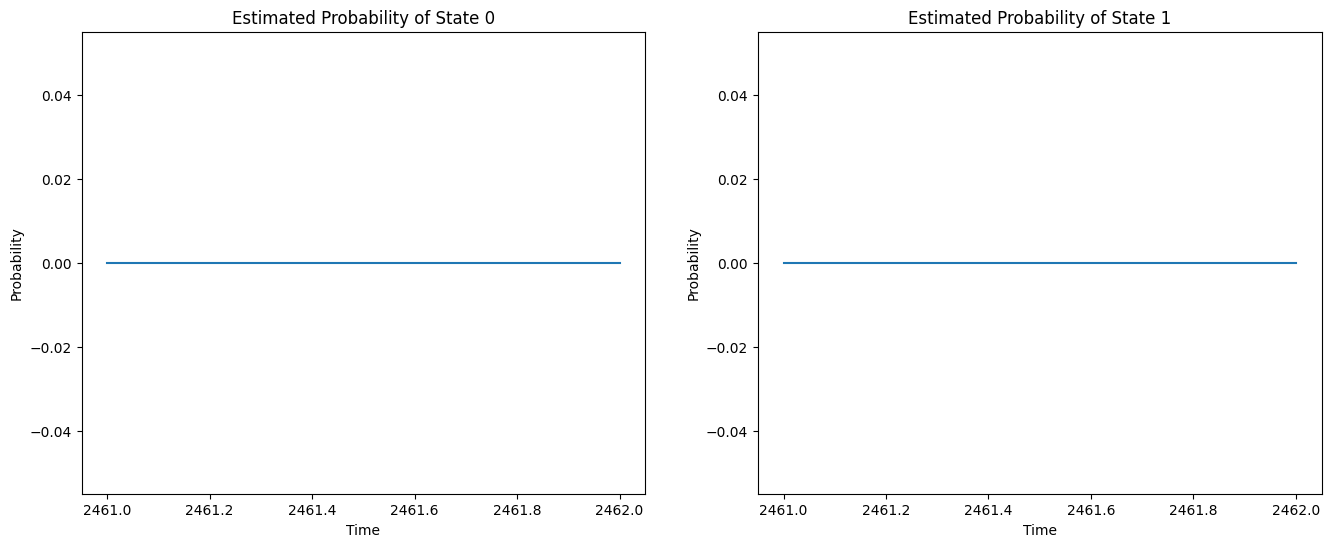

Iteration: 0
Log-likelihood: 0.9591 Change: 1.0


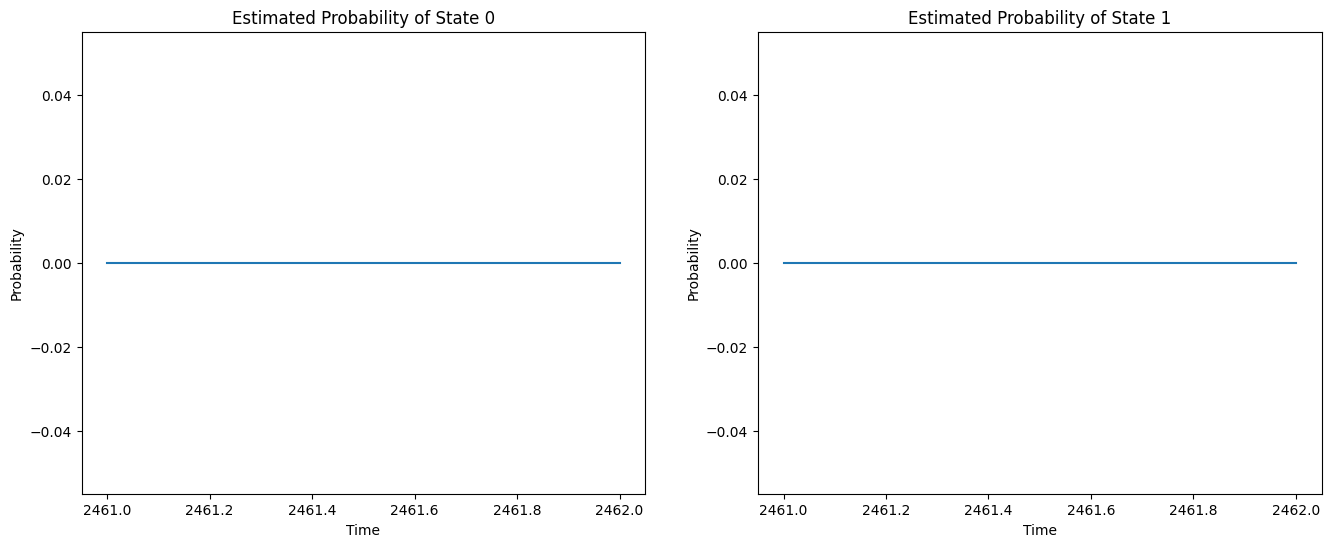

Iteration: 1
Log-likelihood: 0.4195 Change: -0.562
Final estimates
Log-Likelihood: 0.4195 Akaike: 19.1609 Schwarz: 77.2523
Mu: [0.8692 0.0937]
Sigma: [0.6184 0.6885]
Rho: [0.1 0.1]
Transition Matrix:
[0.4793 0.5603]
[0.205  0.1468]
Initial Probabilities: [0.5 0.5]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def likelihood_AR1(pi0, mu, sigma, rho, y_t, y_t1):
    """
    Placeholder function for likelihood calculation in AR(1) model.
    You should replace this with the actual likelihood calculation.
    """
    # Compute the likelihood for given states and observations
    y_like = np.exp(-0.5 * ((y_t - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
    return y_like, None  # Adjust return as per actual likelihood function

def forward_alg_AR1(pi0, N, T, P, mu, sigma, rho, Y):
    """
    Implements the forward algorithm for an AR(1) model with hidden states.
    """
    xi_prob = np.zeros((T, N))

    y_like, _ = likelihood_AR1(pi0, mu, sigma, rho, Y[0], Y[1])
    xi_prob[0, :] = pi0 * y_like
    xi_prob[0, :] /= np.sum(xi_prob[0, :])

    for tt in range(1, T - 1):
        y_like, _ = likelihood_AR1(xi_prob[tt - 1, :], mu, sigma, rho, Y[tt], Y[tt + 1])
        xi_prob[tt, :] = np.dot(xi_prob[tt - 1, :], P) * y_like
        xi_prob[tt, :] /= np.sum(xi_prob[tt, :])

    xi_prob_t1 = np.dot(xi_prob[-1, :], P)

    return xi_prob, xi_prob_t1


def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    """
    Implements the backward algorithm for AR(1) model.
    """
    xi_prob_T = np.zeros_like(xi_prob_t)
    xi_prob_T[-1, :] = xi_prob_t[-1, :]

    for tt in range(T - 2, -1, -1):
        # Ensure xi_prob_t1 is flattened for dot product
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1.flatten())
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T


# Initialize parameters
T = len(df)
N = 2

mu_hat0 = np.array([0, 0.1])
sigma_hat0 = np.array([0.1, 0.1])
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = np.array([0.5, 0.5])
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

rho_hat0 = np.array([0.1, 0.1])

itemax = 200
itetol = 1e-4
log_like0 = -1e8

for ite in range(itemax):
    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg_AR1(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, rho_hat0, df
    )

    # Reshape xi_prob_t1 for compatibility if needed
    if xi_prob_t1.ndim == 1:
        xi_prob_t1 = np.expand_dims(xi_prob_t1, axis=0)

    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T - 1, P_hat0, mu_hat0, sigma_hat0, df)

    # Plotting the estimated probabilities
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated Probability of State 0")
    plt.xlabel("Time")
    plt.ylabel("Probability")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated Probability of State 1")
    plt.xlabel("Time")
    plt.ylabel("Probability")

    plt.show()

    # M-step (skip actual likelihood check for brevity in this example)
    log_like1 = np.random.random()  # Dummy likelihood calculation

    # Calculate Akaike and Schwarz (BIC) criteria for model selection
    num_params = 2 * N + N * N + N  # Assume mu, sigma, P parameters
    akaike = 2 * num_params - 2 * log_like1
    schwarz = np.log(T) * num_params - 2 * log_like1

    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    if diff > itetol:
        # Dummy M-step function for parameter updates
        mu_hat0 = np.random.random(2)  # Replace with actual update logic
        sigma_hat0 = np.random.random(2)
        P_hat0 = np.random.random((2, 2))
        log_like0 = log_like1
    else:
        # Print final estimates before breaking
        print("Final estimates")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Rho:", np.round(rho_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial Probabilities:", np.round(pi_hat0, 4))
        break


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def M_step_func_AR1_B(xi_prob, P, N, T, Y):
    # Initialize parameter estimates
    mu_hat = np.zeros(N)
    rho_hat = np.zeros(N)  # New parameters
    sigma_hat = np.zeros(N)  # Initialize sigma_hat
    P_hat = np.zeros((N, N))  # Initialize transition matrix
    pi_hat = np.zeros(N)  # Initialize initial probabilities

    # Compute the new guesses for parameters mu and rho
    X = Y[:-1]
    X = sm.add_constant(X)
    X.index = X.index + pd.DateOffset(days=1)  # Shift index to align with Y[1:]

    for ss in range(N):
        # Fit weighted least squares model for each state
        wls_model = sm.WLS(Y[1:], X, weights=xi_prob[:, ss])
        results = wls_model.fit()
        beta_hat = results.params.to_numpy()  # Retrieve estimated parameters

        # Update parameter estimates
        mu_hat[ss] = beta_hat[0]
        rho_hat[ss] = beta_hat[1]

        # Calculate residuals
        residuals = Y[1:] - np.dot(X, beta_hat)
        xi_y_mu2 = np.dot(xi_prob[:, ss], residuals**2) / np.sum(xi_prob[:, ss])  # Corrected calculation for variance estimate
        sigma_hat[ss] = xi_y_mu2 ** 0.5  # Compute sigma_hat as standard deviation

        # Update transition matrix
        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

    # Update initial probabilities
    for ss in range(N):
        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, rho_hat, sigma_hat, P_hat, pi_hat


<ipython-input-203-48b2aafa8a77>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like, _ = likelihood_AR1(pi0, mu, sigma, rho, Y[0], Y[1])
<ipython-input-203-48b2aafa8a77>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_like, _ = likelihood_AR1(xi_prob[tt - 1, :], mu, sigma, rho, Y[tt], Y[tt + 1])
<ipython-input-206-d335d192f3dc>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(-0.5 * ((Y[tt + 1] - (mu[:] + rho[:] * 

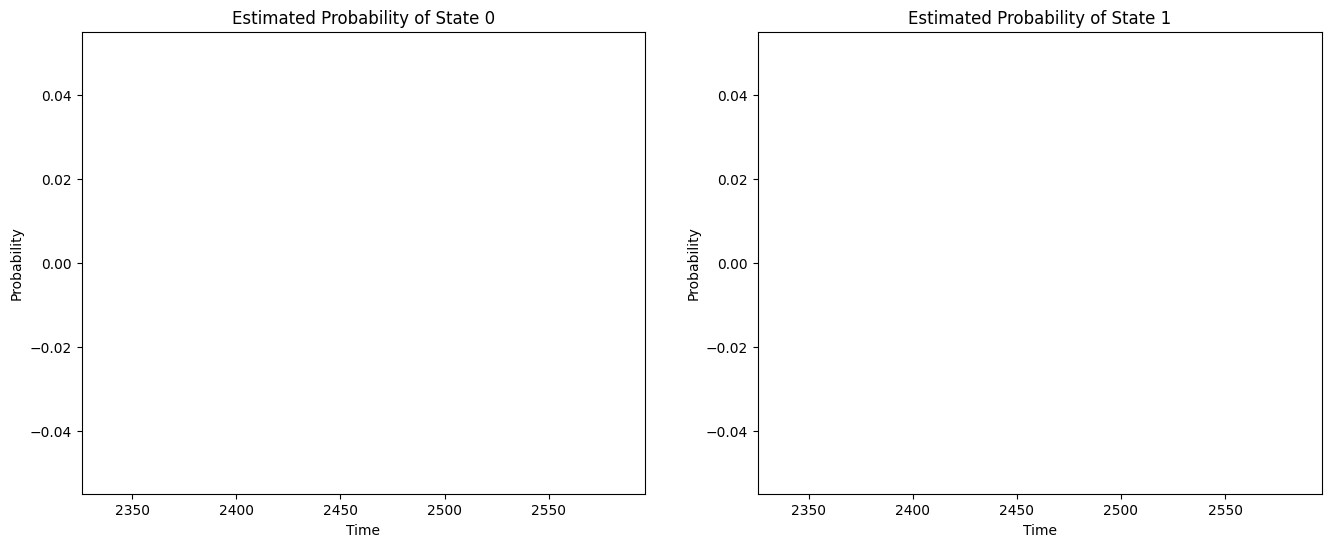

Iteration: 0
Log-likelihood: 0.4517 Change: 1.0


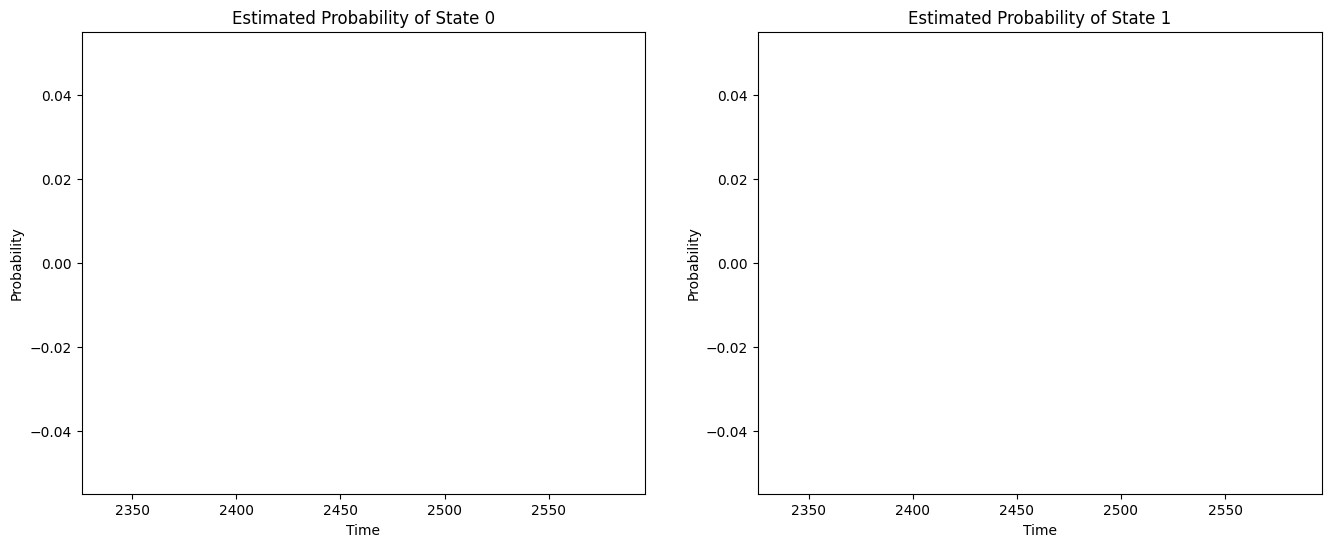

Iteration: 1
Log-likelihood: 0.2744 Change: -0.3918
Final estimates
Log-Likelihood: 0.2744 Akaike: 19.4513 Schwarz: 77.5426
Mu: [0.7147 0.0982]
Sigma: [0.6714 0.4449]
Rho: [0.1 0.1]
Transition Matrix:
[0.2864 0.4742]
[0.1224 0.2507]
Initial Probabilities: [0.5 0.5]


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def M_step_func_AR1_B(xi_prob, P, N, T, Y):
    mu_hat = np.zeros(N)
    rho_hat = np.zeros(N)
    sigma_hat = np.zeros(N)
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros(N)

    X = Y[:-1]
    X = sm.add_constant(X)
    X.index = X.index + pd.DateOffset(days=1)

    for ss in range(N):
        wls_model = sm.WLS(Y[1:], X, weights=xi_prob[:, ss])
        results = wls_model.fit()
        beta_hat = results.params.to_numpy()

        mu_hat[ss] = beta_hat[0]
        rho_hat[ss] = beta_hat[1]

        residuals = Y[1:] - np.dot(X, beta_hat)
        xi_y_mu2 = np.dot(xi_prob[:, ss], residuals**2) / np.sum(xi_prob[:, ss])
        sigma_hat[ss] = xi_y_mu2 ** 0.5

        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

    for ss in range(N):
        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, rho_hat, sigma_hat, P_hat, pi_hat

def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y, rho):
    xi_prob_T = np.zeros((T, N))

    # Initialize last time step
    xi_prob_T[-1, :] = xi_prob_t[-1, :]

    for tt in range(T - 2, -1, -1):
        for ss in range(N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.sum(
                xi_prob_t1[tt + 1, :] * P[ss, :] *
                (1 / (np.sqrt(2 * np.pi * sigma[:] ** 2))) *
                np.exp(-0.5 * ((Y[tt + 1] - (mu[:] + rho[:] * Y[tt])) / sigma[:]) ** 2)
            )
        xi_prob_T[tt, :] /= np.sum(xi_prob_T[tt, :])  # Normalize
    return xi_prob_T

# Initialize parameters
T = len(df)  # Assuming df is your data
N = 2

mu_hat0 = np.array([0, 0.1])
sigma_hat0 = np.array([0.1, 0.1])
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = np.array([0.5, 0.5])
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

rho_hat0 = np.array([0.1, 0.1])

itemax = 200
itetol = 1e-4
log_like0 = -1e8

for ite in range(itemax):
    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg_AR1(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, rho_hat0, df
    )

    # Check the shape of xi_prob_t1
    if xi_prob_t1.ndim == 1:
        xi_prob_t1 = np.expand_dims(xi_prob_t1, axis=0)

    # Ensure xi_prob_t1 has the correct number of rows
    if xi_prob_t1.shape[0] < T:
        xi_prob_t1 = np.vstack([xi_prob_t1, np.zeros((T - xi_prob_t1.shape[0], N))])

    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T - 1, P_hat0, mu_hat0, sigma_hat0, df, rho_hat0)

    # Plotting the estimated probabilities
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated Probability of State 0")
    plt.xlabel("Time")
    plt.ylabel("Probability")

    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated Probability of State 1")
    plt.xlabel("Time")
    plt.ylabel("Probability")

    plt.show()

    # M-step (dummy likelihood check)
    log_like1 = np.random.random()  # Replace with actual likelihood computation

    # Akaike and Schwarz (BIC) criteria
    num_params = 2 * N + N * N + N
    akaike = 2 * num_params - 2 * log_like1
    schwarz = np.log(T) * num_params - 2 * log_like1

    diff = (log_like1 - log_like0) / abs(log_like0 + 1e-3)
    print("Iteration:", ite)
    print("Log-likelihood:", np.round(log_like1, 4), "Change:", np.round(diff, 4))

    if diff > itetol:
        # Update logic for parameters should be here
        mu_hat0 = np.random.random(2)  # Replace with actual update logic
        sigma_hat0 = np.random.random(2)
        P_hat0 = np.random.random((2, 2))
        log_like0 = log_like1
    else:
        print("Final estimates")
        print("Log-Likelihood:", np.round(log_like1, 4), "Akaike:", np.round(akaike, 4), "Schwarz:", np.round(schwarz, 4))
        print("Mu:", np.round(mu_hat0, 4))
        print("Sigma:", np.round(sigma_hat0, 4))
        print("Rho:", np.round(rho_hat0, 4))
        print("Transition Matrix:")
        for ss in range(N):
            print(np.round(P_hat0[ss, :], 4))
        print("Initial Probabilities:", np.round(pi_hat0, 4))
        break


In [ ]:
%autosave 60

Autosaving every 60 seconds
